In [183]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'carsforsale:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2354614%2F3967386%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240711%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240711T122329Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6214d937a5f8db4d1c1086dfc90b1d3d4ef1bf1bc17e513b27b2ba587ad12f551f0c8f0a531d86d871dcf08aaffc72e23179f6b0fcc58eacab00b7006a9cf9c187bedc0872b55de42f9e479f62e7502cbefbc9f794e6058954791061efe1950bac1fd841657e9f1a105a9296318869ab319c90ef8e6d8044272b7ca2bc3319bac2d970ff92bdeff7d1be8b9cce4b6b169df6413d7e29c842809802654c47aa0f81c966c3857adccc336a77c42851185b56523914a845f6efe19141e25ca4856f138c4c7cdae9a2025f4cdad428cefc9f5614b115a11b3fac269bc7e4103f60fad26141c27272e5a4a41db9dd4d786fe6f9d6841f626b688789befc28c00f0d61'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 810173 bytes downloaded
Downloaded and uncompressed: carsforsale
Data source import complete.


In [184]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline



pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings("ignore")



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/carsforsale/cars_raw.csv


# Import Libraries

In [3]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'carsforsale:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2354614%2F3967386%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240711%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240711T122329Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6214d937a5f8db4d1c1086dfc90b1d3d4ef1bf1bc17e513b27b2ba587ad12f551f0c8f0a531d86d871dcf08aaffc72e23179f6b0fcc58eacab00b7006a9cf9c187bedc0872b55de42f9e479f62e7502cbefbc9f794e6058954791061efe1950bac1fd841657e9f1a105a9296318869ab319c90ef8e6d8044272b7ca2bc3319bac2d970ff92bdeff7d1be8b9cce4b6b169df6413d7e29c842809802654c47aa0f81c966c3857adccc336a77c42851185b56523914a845f6efe19141e25ca4856f138c4c7cdae9a2025f4cdad428cefc9f5614b115a11b3fac269bc7e4103f60fad26141c27272e5a4a41db9dd4d786fe6f9d6841f626b688789befc28c00f0d61'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 810173 bytes downloaded
Downloaded and uncompressed: carsforsale
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline



pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings("ignore")



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [185]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression # LinearRegression algortimasını import ediyoruz.

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

# modelimizin çıkan sonuçlarnı değerlendirmek için kullanılan görselleştirme kütüphaneleri

from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz
from yellowbrick.regressor import ResidualsPlot

from sklearn.tree import DecisionTreeRegressor


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings("ignore")


kullanılacak sütunlar:
- Year: Modelin yılı
- Make: araba'nın markası
- Model: arabanın modeli
- Used_New: ullanılıp kullanılmadığı
- Price(target): satıştaki fiyatı
- Consumer rating: arabaya gelen ortalama rate sayısı
- Consumer reviews: arbaaya gelen ortalama yorum sayısı
- seller type(categorik):dealer-private
- seller rating: satısıcının puanı
- seller review: satıcının aldığı yorumların ortalama
- deal type: satıcının pazarlığa olan davranışı
- ComfortRating	: arabanın rahatlığı
- InteriorDesignRating	: iç tasarımının değerlendirilmesi
- PerformanceRating: arabanın performansının değerlendirilmesi
- ValueForMoneyRating
- ExteriorStylingRating
- ReliabilityRating
- drive train: araç hareketinin nasıl sağlandığı ile ilgili
- fuel type
- MinMPG
- MaxMPG
- Engine
- transmission
- mileage

In [186]:
df= pd.read_csv("/kaggle/input/carsforsale/cars_raw.csv")

In [ ]:
df.head()

Year    Make            Model Used/New    Price  ConsumerRating  \
0  2019  Toyota        Sienna SE     Used  $39,998             4.6   
1  2018    Ford     F-150 Lariat     Used  $49,985             4.8   
2  2017     RAM     1500 Laramie     Used  $41,860             4.7   
3  2021   Honda  Accord Sport SE     Used  $28,500             5.0   
4  2020   Lexus           RX 350     Used  $49,000             4.8   

   ConsumerReviews SellerType  \
0               45     Dealer   
1              817     Dealer   
2              495     Dealer   
3               36     Dealer   
4               76     Dealer   

                                                         SellerName  \
0  CarMax Murrieta - Now offering Curbside Pickup and Home Delivery   
1                                                   Giant Chevrolet   
2                                            Gill Auto Group Madera   
3                                               AutoSavvy Las Vegas   
4                                                Lexus of Henderson   

   SellerRating  SellerReviews                     StreetName State Zipcode  \
0           3.3              3     25560 Madison Ave Murrieta    CA   92562   
1           4.8            131  1001 S Ben Maddox Way Visalia    CA   93292   
2           4.6            249       1100 S Madera Ave Madera    CA   93637   
3           4.6            284    2121 E Sahara Ave Las Vegas    NV   89104   
4           4.8           4755     7737 Eastgate Rd Henderson    NV   89011   

  DealType  ComfortRating  InteriorDesignRating  PerformanceRating  \
0    Great            4.7                   4.6                4.6   
1     Good            4.9                   4.8                4.8   
2     Good            4.8                   4.7                4.8   
3      NaN            4.9                   5.0                4.9   
4     Good            4.9                   4.8                4.8   

   ValueForMoneyRating  ExteriorStylingRating  ReliabilityRating  \
0                  4.4                    4.6                4.7   
1                  4.6                    4.8                4.7   
2                  4.6                    4.8                4.7   
3                  5.0                    5.0                5.0   
4                  4.7                    4.8                4.9   

                        ExteriorColor InteriorColor         Drivetrain  \
0                                 Red         Black  Front-wheel Drive   
1                        Shadow Black         Black   Four-wheel Drive   
2  Granite Crystal Clearcoat Metallic         Black   Four-wheel Drive   
3                                Gray             –  Front-wheel Drive   
4                 Eminent White Pearl         Birch  Front-wheel Drive   

   MinMPG  MaxMPG  FuelType        Transmission  \
0      19      27  Gasoline   8-Speed Automatic   
1      19      24  Gasoline  10-Speed Automatic   
2      15      21  Gasoline   8-Speed Automatic   
3      29      35  Gasoline       Automatic CVT   
4      20      27  Gasoline   8-Speed Automatic   

                            Engine                VIN     Stock#  Mileage  
0             3.5L V6 24V PDI DOHC  5TDXZ3DC2KS015402   22998646    29403  
1  3.5L V6 24V PDI DOHC Twin Turbo  1FTEW1EG2JFD44217     22418A    32929  
2             5.7L V8 16V MPFI OHV  1C6RR7VT5HS842283  NG277871G    23173  
3       1.5L I4 16V GDI DOHC Turbo  1HGCV1F49MA038035      54237    10598  
4             3.5L V6 24V PDI DOHC  2T2AZMAA8LC156270   HDT4181A    28137

In [ ]:
df.describe().T

# If standard deviation is greater than or close to the mean, it gives us an inference that there is an outlier problem in our data.

# If there is a gap between the "min" and the first quartile of 25% and/or between the 3rd quartile of 75% and the "max", it provides an inference that there may be a limited number of outlier values in our data, but not in general.

count     mean      std     min      25%      50%  \
Year                  9379.00  2018.72     2.22 2001.00  2018.00  2019.00   
ConsumerRating        9379.00     4.70     0.24    2.50     4.70     4.80   
ConsumerReviews       9379.00   133.19   154.99    1.00    30.00    75.00   
SellerRating          9379.00     4.41     0.63    1.00     4.30     4.60   
SellerReviews         9379.00   984.09  1609.04    1.00   112.00   542.00   
ComfortRating         9379.00     4.77     0.22    3.00     4.70     4.80   
InteriorDesignRating  9379.00     4.73     0.19    2.80     4.70     4.80   
PerformanceRating     9379.00     4.70     0.25    1.00     4.60     4.70   
ValueForMoneyRating   9379.00     4.54     0.34    1.00     4.50     4.60   
ExteriorStylingRating 9379.00     4.78     0.17    3.00     4.70     4.80   
ReliabilityRating     9379.00     4.68     0.37    1.00     4.60     4.80   
MinMPG                9379.00    22.76    14.81    0.00    18.00    20.00   
MaxMPG                9379.00    29.22    12.81    0.00    25.00    27.00   
Mileage               9379.00 37463.02 24970.34  121.00 18666.50 32907.00   

                           75%       max  
Year                   2020.00   2022.00  
ConsumerRating            4.80      5.00  
ConsumerReviews         182.00    817.00  
SellerRating              4.80      5.00  
SellerReviews          1272.00  27824.00  
ComfortRating             4.90      5.00  
InteriorDesignRating      4.80      5.00  
PerformanceRating         4.80      5.00  
ValueForMoneyRating       4.70      5.00  
ExteriorStylingRating     4.90      5.00  
ReliabilityRating         4.90      5.00  
MinMPG                   24.00    150.00  
MaxMPG                   31.00    133.00  
Mileage               47698.00 234114.00

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9379 entries, 0 to 9378
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9379 non-null   int64  
 1   Make                   9379 non-null   object 
 2   Model                  9379 non-null   object 
 3   Used/New               9379 non-null   object 
 4   Price                  9379 non-null   object 
 5   ConsumerRating         9379 non-null   float64
 6   ConsumerReviews        9379 non-null   int64  
 7   SellerType             9379 non-null   object 
 8   SellerName             9379 non-null   object 
 9   SellerRating           9379 non-null   float64
 10  SellerReviews          9379 non-null   int64  
 11  StreetName             9379 non-null   object 
 12  State                  9379 non-null   object 
 13  Zipcode                9379 non-null   object 
 14  DealType               9157 non-null   object 
 15  Comf

# EDA

In [ ]:
#We looked columns as a object
df.select_dtypes(include ="object").head()

Make            Model Used/New    Price SellerType  \
0  Toyota        Sienna SE     Used  $39,998     Dealer   
1    Ford     F-150 Lariat     Used  $49,985     Dealer   
2     RAM     1500 Laramie     Used  $41,860     Dealer   
3   Honda  Accord Sport SE     Used  $28,500     Dealer   
4   Lexus           RX 350     Used  $49,000     Dealer   

                                                         SellerName  \
0  CarMax Murrieta - Now offering Curbside Pickup and Home Delivery   
1                                                   Giant Chevrolet   
2                                            Gill Auto Group Madera   
3                                               AutoSavvy Las Vegas   
4                                                Lexus of Henderson   

                      StreetName State Zipcode DealType  \
0     25560 Madison Ave Murrieta    CA   92562    Great   
1  1001 S Ben Maddox Way Visalia    CA   93292     Good   
2       1100 S Madera Ave Madera    CA   93637     Good   
3    2121 E Sahara Ave Las Vegas    NV   89104      NaN   
4     7737 Eastgate Rd Henderson    NV   89011     Good   

                        ExteriorColor InteriorColor         Drivetrain  \
0                                 Red         Black  Front-wheel Drive   
1                        Shadow Black         Black   Four-wheel Drive   
2  Granite Crystal Clearcoat Metallic         Black   Four-wheel Drive   
3                                Gray             –  Front-wheel Drive   
4                 Eminent White Pearl         Birch  Front-wheel Drive   

   FuelType        Transmission                           Engine  \
0  Gasoline   8-Speed Automatic             3.5L V6 24V PDI DOHC   
1  Gasoline  10-Speed Automatic  3.5L V6 24V PDI DOHC Twin Turbo   
2  Gasoline   8-Speed Automatic             5.7L V8 16V MPFI OHV   
3  Gasoline       Automatic CVT       1.5L I4 16V GDI DOHC Turbo   
4  Gasoline   8-Speed Automatic             3.5L V6 24V PDI DOHC   

                 VIN     Stock#  
0  5TDXZ3DC2KS015402   22998646  
1  1FTEW1EG2JFD44217     22418A  
2  1C6RR7VT5HS842283  NG277871G  
3  1HGCV1F49MA038035      54237  
4  2T2AZMAA8LC156270   HDT4181A

In [ ]:
# kategorik verilerde unique değerlere baktık
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())# col<20: çıktının daha okunabilri hale gelmesi için

Make                : 41
Model               : 1304
Used/New            : 26
Price               : 5064
SellerType          : 2
SellerName          : 3971
StreetName          : 3967
State               : 59
Zipcode             : 2163
DealType            : 3
ExteriorColor       : 949
InteriorColor       : 374
Drivetrain          : 10
FuelType            : 13
Transmission        : 93
Engine              : 326
VIN                 : 8474
Stock#              : 8431


In [ ]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

Year    Make                      Model Used/New    Price  \
212   2004  Toyota            Highlander Base     Used   $5,995   
4930  2004  Toyota            Highlander Base     Used   $5,995   
2607  2005   Acura                MDX Touring     Used   $6,495   
7006  2005   Acura                MDX Touring     Used   $6,495   
1716  2007  Toyota                   Camry LE     Used   $9,950   
...    ...     ...                        ...      ...      ...   
6345  2022   Tesla         Model 3 Long Range     Used  $66,237   
1596  2022  Toyota  Highlander Hybrid Limited     Used  $52,955   
4898  2022  Toyota  Highlander Hybrid Limited     Used  $52,955   
3145  2022   Volvo        XC60 B5 Inscription     Used  $48,500   
8491  2022   Volvo        XC60 B5 Inscription     Used  $48,500   

      ConsumerRating  ConsumerReviews SellerType  \
212             4.50               47     Dealer   
4930            4.50               47     Dealer   
2607            4.70               54     Dealer   
7006            4.70               54     Dealer   
1716            4.20              301     Dealer   
...              ...              ...        ...   
6345            4.80                2     Dealer   
1596            5.00                2     Dealer   
4898            5.00                2     Dealer   
3145            2.70                1     Dealer   
8491            2.70                1     Dealer   

                            SellerName  SellerRating  SellerReviews  \
212               Northtown Auto Sales          4.90              2   
4930              Northtown Auto Sales          4.90              2   
2607                         JP Motors          4.30              7   
7006                         JP Motors          4.30              7   
1716                      TJK AUTO LLC          4.10             10   
...                                ...           ...            ...   
6345  Napleton's Volkswagen of Sanford          4.60            795   
1596         AutoNation Toyota Hayward          4.40           1071   
4898         AutoNation Toyota Hayward          4.40           1071   
3145        Volvo Cars Mall of Georgia          4.90           2106   
8491        Volvo Cars Mall of Georgia          4.90           2106   

                              StreetName State Zipcode DealType  \
212   8325 University Ave NE Minneapolis    MN   55432     Good   
4930  8325 University Ave NE Minneapolis    MN   55432     Good   
2607        7411 Centreville Rd Manassas    VA   20111     Good   
7006        7411 Centreville Rd Manassas    VA   20111     Good   
1716                14227 S Street Omaha    NE   68137    Great   
...                                  ...   ...     ...      ...   
6345             4175 S. Orlando Sanford    FL   32773     Good   
1596          24773 Mission Blvd Hayward    CA   94544    Great   
4898          24773 Mission Blvd Hayward    CA   94544    Great   
3145            3626 Buford Dr NE Buford    GA   30519     Good   
8491            3626 Buford Dr NE Buford    GA   30519     Good   

      ComfortRating  InteriorDesignRating  PerformanceRating  \
212            4.60                  4.30               4.40   
4930           4.60                  4.30               4.40   
2607           4.80                  4.50               4.60   
7006           4.80                  4.50               4.60   
1716           4.40                  4.10               4.10   
...             ...                   ...                ...   
6345           5.00                  4.50               5.00   
1596           5.00                  5.00               5.00   
4898           5.00                  5.00               5.00   
3145           5.00                  5.00               1.00   
8491           5.00                  5.00               1.00   

      ValueForMoneyRating  ExteriorStylingRating  ReliabilityRating  \
212                  4.60                   4.30               4.70   
4930   

In [187]:
def clean_data(df):
    #used-new column replaced to categorical column as a 2 category
    df["Used/New"] = df["Used/New"].str.replace(r'.*Certified.*', 'Certified', regex=True)

    #Price column cleaned and turned to float
    df["Price"] = df["Price"].astype(str).str.replace('$', '').str.replace(',', '.')
    df["Price"] = pd.to_numeric(df["Price"], errors='coerce')

    #drive-train column
    nan_drivetrain = df["Drivetrain"].isna()
    df["Drivetrain"] = df["Drivetrain"].replace("–", np.nan)

    df["Drivetrain"]=df["Drivetrain"].str.replace("All-wheel Drive", "AWD")
    df["Drivetrain"]=df["Drivetrain"].str.replace("Front-wheel Drive", "FWD")
    df["Drivetrain"]=df["Drivetrain"].str.replace("Front Wheel Drive", "FWD")
    df["Drivetrain"]=df["Drivetrain"].str.replace("Four-wheel Drive", "4WD")
    df["Drivetrain"]=df["Drivetrain"].str.replace("Rear-wheel Drive", "RWD")

    df["Drivetrain"].loc[nan_drivetrain] = np.nan

    #Transmission
    df.Transmission = df.Transmission.str.lower()
    df.Transmission = df.Transmission.str.replace("-", " ")
    df.Transmission = df.Transmission.str.replace("m/t", "manual")
    df.Transmission = df.Transmission.str.replace("a/t", "automatic")
    df.Transmission = df.Transmission.replace("–", np.nan)

    df.Engine = df.Engine.replace("–", np.nan)


    #FuelType
    df["FuelType"]= df["FuelType"].replace("–",np.nan)

    return df


In [188]:
def fill_na(df):
    # Drivetrain sütunundaki NaN değerlerini doldurma
    #Model ve markaya göre drivetrain grupladık sonra burdan aldığımız değerlerle null değerleri doldurduk. mode değeri
    drive_train_df = df.groupby(["Make", "Model"])["Drivetrain"].apply(lambda x: x.mode()[0] if x.mode().any() else None).reset_index()
    df = pd.merge(df, drive_train_df, on=["Make", "Model"], suffixes=('', '_ref'), how='left')
    df['Drivetrain'] = df['Drivetrain'].fillna(df['Drivetrain_ref'])
    df.drop("Drivetrain_ref", axis=1,inplace=True)
    value_counts_dr = df.Drivetrain.isna().sum()


    # DealType sütunundaki NaN değerlerini doldurma
    deal_type_df = df.groupby("SellerName")["DealType"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()
    df = pd.merge(df, deal_type_df, on="SellerName", suffixes=('', '_ref'), how='left')
    df['DealType'] = df['DealType'].fillna(df['DealType_ref'])
    df.drop("DealType_ref", axis=1,inplace=True)
    value_counts_dt = df.DealType.isna().sum()


    # FuelType sütunundaki NaN değerlerini doldurma
    fuel_type_df = df.groupby(["Make", "Model"])["FuelType"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()
    df = pd.merge(df, fuel_type_df, on=["Make", "Model"], suffixes=('', '_ref'), how='left')
    df['FuelType'] = df['FuelType'].fillna(df['FuelType_ref'])
    df.drop(columns=['FuelType_ref'], inplace=True)
    value_counts_ft = df.FuelType.isna().sum()

    df.dropna(subset=["Price"], inplace=True)

    df.dropna(subset=["Transmission"], inplace=True)
    df.dropna(subset=["Engine"], inplace=True)


    if value_counts_dr > 0:
        print("There are", value_counts_dr, "Drivetrain values left as NaN.")
        df.dropna(subset=["Drivetrain"], inplace=True)
    else:
        print(value_counts_dr, "value droped")

    if value_counts_dt > 0:
        print("There are", value_counts_dt, "DealType values left as NaN.")
        df.dropna(subset=["DealType"], inplace=True)
    else:
        print(value_counts_dt, + "value droped")

    if value_counts_ft > 0:
        print("There are", value_counts_ft, "FuelType values left as NaN.")
        df.dropna(subset=["FuelType"], inplace=True)
    else:
        print(value_counts_ft,"value droped")

    return df


In [189]:
# Checks for duplicate observations in the data set and removes them

def duplicate_values(df):

    print("Duplicate check:")
    num_duplicates = df.duplicated(subset=None, keep='first').sum() #ilk görülen çift tutulur diğeri çift olarak işaretlenir

    if num_duplicates > 0:

        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")

    else:
        print("There are no duplicated observations in the dataset.")

    return df

In [190]:
#Fonksiyonları uygulama
df = duplicate_values(df)
df = clean_data(df)
df = fill_na(df)

Duplicate check:
There are 872 duplicated observations in the dataset.
872 duplicates were dropped!
No more duplicate rows!
There are 1 Drivetrain values left as NaN.
There are 104 DealType values left as NaN.
There are 4 FuelType values left as NaN.


## Splitin transmiision column

In [191]:
import re

In [192]:
auto_pattern = re.compile(r'\b(\d\s)?auto(matic)?\b|\bauto(matic)?\s(\d\b|\d\s\w+)?', re.IGNORECASE)
manual_pattern = re.compile(r'\b(\d\s)?manual\b|\bmanual\s\d\b', re.IGNORECASE)
speed_pattern = re.compile(r'(\d+)\s*speed', re.IGNORECASE)
cvt_pattern = re.compile(r'\b(cvt|continuously variable|xtronic continuously variable)\b', re.IGNORECASE)


def categorize_transmission(transmission):
    if cvt_pattern.search(transmission):
        return 'cvt'
    elif auto_pattern.search(transmission):
        return 'auto'
    elif manual_pattern.search(transmission):
        return 'manuel'
    else:
        return transmission

def extract_speed(transmission):
    match = speed_pattern.search(transmission)
    if match:
        return match.group(1)
    else:
        # "spd" yazısını kontrol eden ek desen
        spd_pattern = re.compile(r'(\d+)\s*spd', re.IGNORECASE)
        match = spd_pattern.search(transmission)
        return match.group(1) if match else None

df['Transmission_Type'] = df['Transmission'].apply(categorize_transmission)
df['Speed_Type'] = df['Transmission'].apply(extract_speed)

In [193]:
df.Speed_Type.value_counts(dropna=False)

Speed_Type
8       2979
6       1575
None    1562
9        943
7        567
10       416
1        161
5        154
4         28
2          2
Name: count, dtype: int64

In [194]:
a = df[df.Speed_Type.isna()==True]
a.Transmission_Type.value_counts()

Transmission_Type
cvt                               1169
auto                               360
variable                            26
transmission w/dual shift mode       4
manuel                               2
a                                    1
Name: count, dtype: int64

In [195]:
df['Speed_Type'] = pd.to_numeric(df['Speed_Type'], errors='coerce')

In [196]:
max_speed_auto = df[df['Transmission_Type'] == 'auto']['Speed_Type'].dropna().max()
df.loc[(df['Transmission_Type'] == 'auto') & (df['Speed_Type'].isna()), 'Speed_Type'] = max_speed_auto


In [197]:
#max_speed_cvt = df[df['Transmission_Type'] == 'cvt']['Speed_Type'].dropna().max()
#df.loc[(df['Transmission_Type'] == 'cvt') & (df['Speed_Type'].isna()), 'Speed_Type'] = "cvt"


In [198]:
todrop = df[df.Transmission_Type=="variable"].index
df.drop(index=todrop, inplace=True)

In [199]:
df.Speed_Type = df.Speed_Type.fillna("0")

In [200]:
df.dropna(subset=["Speed_Type"], inplace=True)

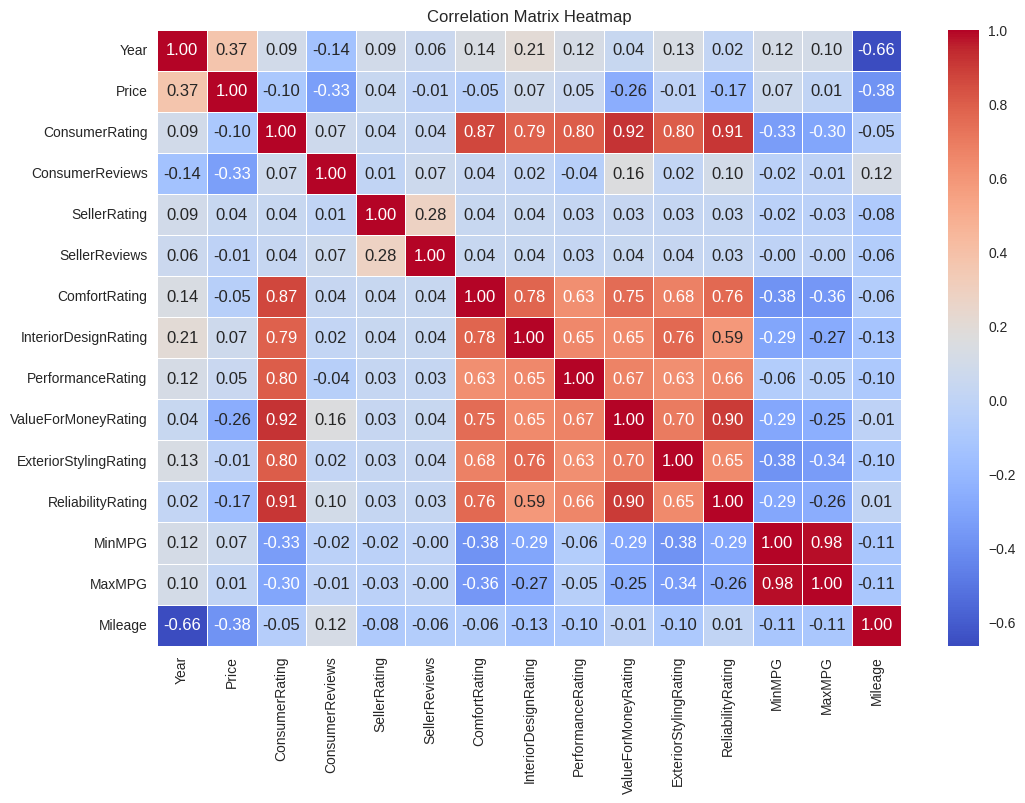

In [201]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


## multicolinerty olan sütunlar üstünde işlme

In [202]:
#df["Consumer_Rate"] = df.ConsumerRating * df.ConsumerReviews

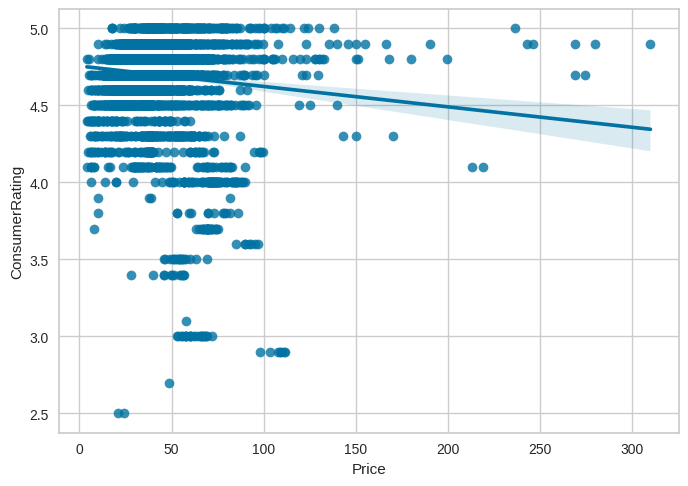

In [203]:
sns.regplot(data = df, x = "Price", y = "ConsumerRating");


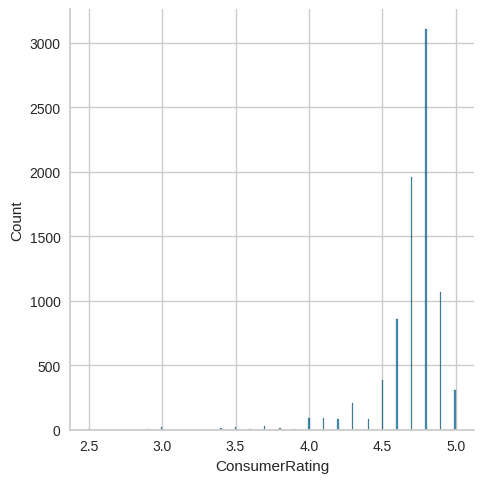

In [204]:
sns.displot(x="ConsumerRating", data = df);


In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF hesaplama
X = df[['ComfortRating', 'InteriorDesignRating', 'PerformanceRating', 'ValueForMoneyRating', 'ExteriorStylingRating', 'ReliabilityRating']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                 feature          VIF
0          ComfortRating  1807.904645
1   InteriorDesignRating  2281.334066
2      PerformanceRating   787.693672
3    ValueForMoneyRating  1090.487747
4  ExteriorStylingRating  1638.604660
5      ReliabilityRating  1001.143587


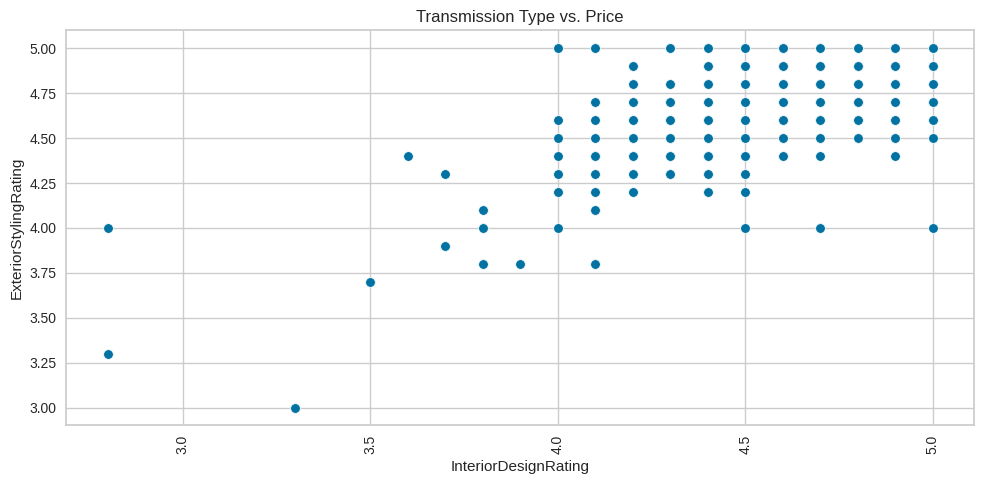

In [206]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='InteriorDesignRating', y='ExteriorStylingRating', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Transmission Type vs. Price')
plt.xlabel('InteriorDesignRating')
plt.ylabel('ExteriorStylingRating')
plt.tight_layout()
plt.show()

In [ ]:
#df['Rating'] = (df["ConsumerRating"]+df['ComfortRating'] + df['InteriorDesignRating'] + df['PerformanceRating'] + df['ValueForMoneyRating'] + df['ExteriorStylingRating'] + df['ReliabilityRating']) / 6


In [207]:
cars_owner_rate = (df.ValueForMoneyRating * df.ReliabilityRating)
df["cars_owner_rate"] = cars_owner_rate

In [208]:
df['weighted_consumer_rating'] = 0.7 * df['cars_owner_rate'] + 0.3 * df['ConsumerRating']


In [209]:
df.drop(['cars_owner_rate','ConsumerRating','ComfortRating', 'InteriorDesignRating', 'PerformanceRating', 'ValueForMoneyRating', 'ExteriorStylingRating', 'ReliabilityRating'], axis=1, inplace=True)

In [210]:
to_drop = df[(df["MinMPG"] == 0) & (df["MaxMPG"] == 0)].index

df.drop(index=to_drop, inplace=True)

In [211]:
max = df[df["MaxMPG"] == 0].index
df.drop(index=max, inplace=True)

In [212]:
min= df[df["MinMPG"] == 0].index
df.drop(index=min, inplace=True)

In [213]:
MPG = df.MinMPG * df.MaxMPG
df["MPG"] = MPG
df.drop(["MinMPG", "MaxMPG"], axis=1, inplace=True)

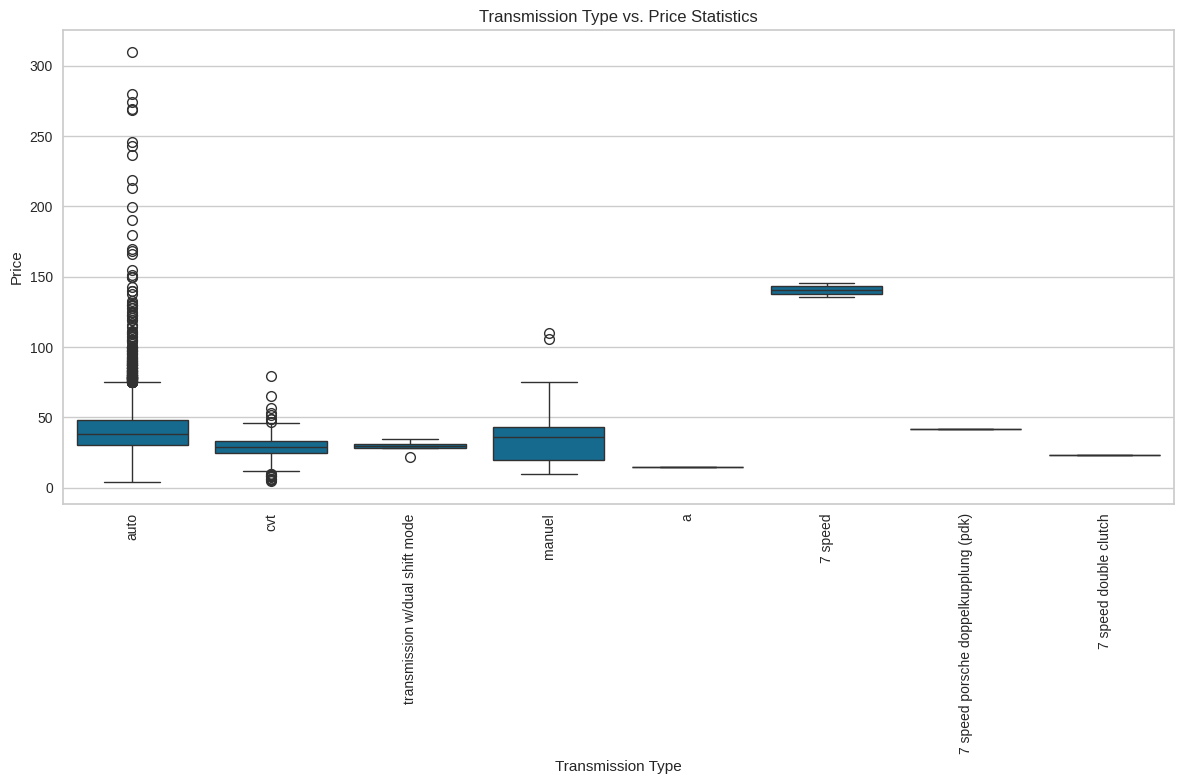

In [214]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Transmission_Type', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Transmission Type vs. Price Statistics')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [215]:
df["Transmission_Type"].value_counts()

Transmission_Type
auto                                    7111
cvt                                     1171
manuel                                    32
transmission w/dual shift mode             4
7 speed                                    2
a                                          1
7 speed porsche doppelkupplung (pdk)       1
7 speed double clutch                      1
Name: count, dtype: int64

In [216]:
df['Transmission_Type'] = df['Transmission_Type'].apply(lambda x: x if x in ['auto', 'cvt'] else 'other')


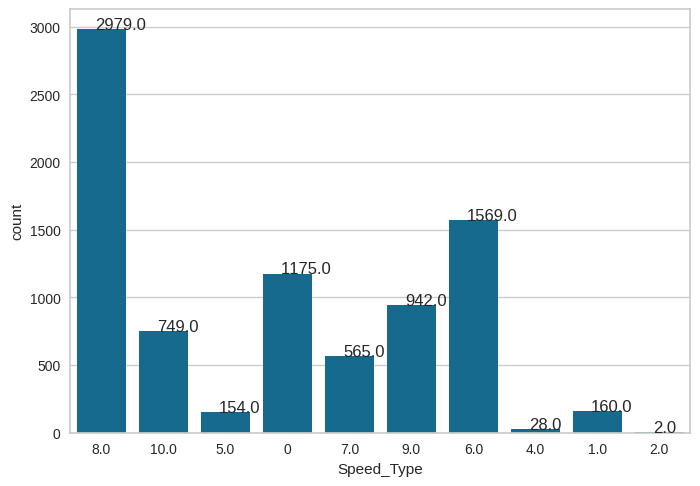

In [ ]:
#Speed Type için de other sütunu kullanabilir miyiz?
fig, ax = plt.subplots()

sns.countplot(data = df, x = "Speed_Type");
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+0.2))

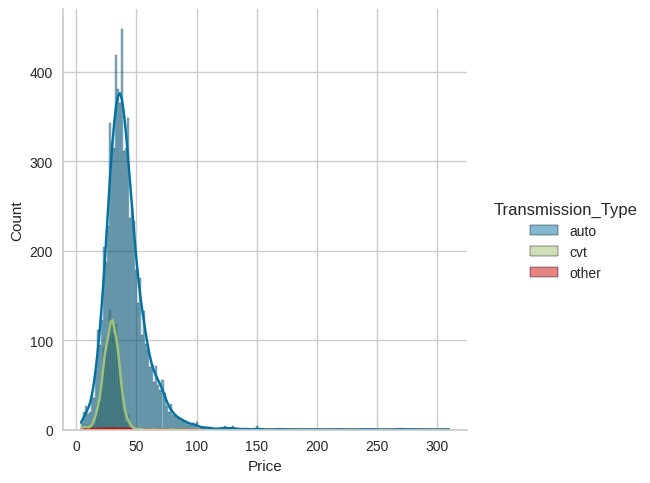

In [ ]:
sns.displot(x = "Price", data = df, hue = "Transmission_Type", kde = True);


In [ ]:
#state_counts = df.State.value_counts()
#rare_state = state_counts[state_counts < 130].index

# Bu değerleri "Other" olarak yeniden kategorize edin
#df['State_1'] = df['State'].apply(lambda x: 'Other' if x in rare_state else x)


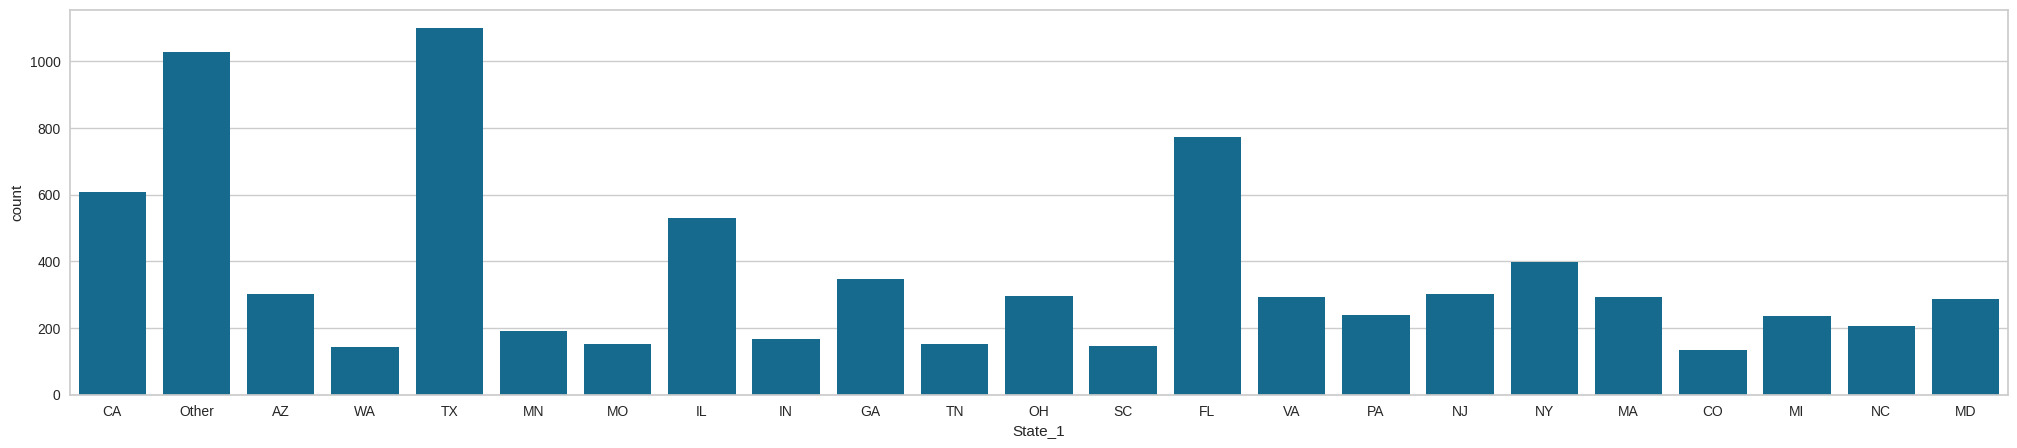

In [ ]:
#State için de other sütunu kullanabilir miyiz?
plt.figure(figsize = (25,5))

sns.countplot(data = df, x = "State_1");


In [ ]:
# kategorik verilerde unique değerlere baktık
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())# col<20: çıktının daha okunabilri hale gelmesi için

Make                : 40
Model               : 1259
Used/New            : 2
SellerType          : 2
SellerName          : 3857
StreetName          : 3852
State               : 59
Zipcode             : 2107
DealType            : 3
ExteriorColor       : 923
InteriorColor       : 358
Drivetrain          : 4
FuelType            : 9
Transmission        : 63
Engine              : 291
VIN                 : 8290
Stock#              : 8262
Transmission_Type   : 3
Speed_Type          : 10
State_1             : 23


In [ ]:
df.FuelType.value_counts()

Gasoline                         7943
Electric                          144
E85 Flex Fuel                     105
Hybrid                             62
Diesel                             36
Gasoline Fuel                      23
Gasoline/Mild Electric Hybrid       5
Flex Fuel Capability                3
Flexible Fuel                       2
Name: FuelType, dtype: int64

In [217]:
df['FuelType'] = df['FuelType'].replace({
    'Gasoline Fuel': 'Gasoline',
    'E85 Flex Fuel': 'Flex Fuel',
    'Flex Fuel Capability': 'Flex Fuel',
    'Gasoline/Mild Electric Hybrid': 'Hybrid',
    "Flexible Fuel" : "Flex Fuel"
})


In [218]:
df.FuelType.value_counts()

FuelType
Gasoline     7966
Electric      144
Flex Fuel     110
Hybrid         67
Diesel         36
Name: count, dtype: int64

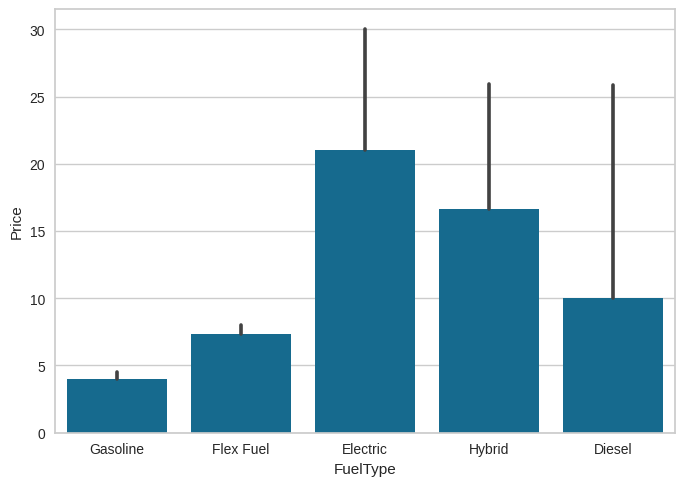

In [ ]:
sns.barplot(x = "FuelType", y = "Price", data = df, estimator = np.min);
#burada bir belirsilik söz konusu

## Engine üstüne işlemler

In [219]:
df["Engine"]=df["Engine"].str.replace("-", "")

In [220]:
pattern_L = r"(\d+(\.\d+)?)\s*L\b"
pattern_VI = r"\b(V\d+|I\d+|H\d+)\b"
pattern_cylinder = r"(\d+)\s*cylinder\b|\b(\d+)\s*cyl\b|\b(\d+)\s*cyl\w*\b"

# Fonksiyonlar
def extract_litre(engine):
    match = re.search(pattern_L, engine)
    return match.group(1) if match else None

def extract_cylinder_arrangement(engine):
    match_VI = re.findall(pattern_VI, engine, flags=re.IGNORECASE)
    match_cylinder = re.findall(pattern_cylinder, engine, flags=re.IGNORECASE)

    if match_VI:
        return match_VI[-1]  # En son bulunan V veya I desenini döndür
    elif match_cylinder:
        for match in match_cylinder[0]:
            if match:
                return f"{match} Cylinder"  # Yakalanan silindir düzenini döndür
    else:
        return None

# Uygulama
df['Litre'] = df['Engine'].apply(extract_litre)
df.Litre = df.Litre.astype(float)
df['Cylindder_Arrangement'] = df['Engine'].apply(extract_cylinder_arrangement)

In [221]:
df[df.Cylindder_Arrangement.isna()==True]  # mesela burda elektrikli araçların litre türünden motor hacmi olmazmış ynai yokmuş aslında bunlar drop edilebilir
#ama ben 0 ile dolduracağım
df.Litre = df.Litre.fillna(0)

In [38]:
df

Year     Make                   Model Used/New   Price  ConsumerReviews  \
0     2019   Toyota               Sienna SE     Used  39.998               45   
1     2018     Ford            F-150 Lariat     Used  49.985              817   
2     2017      RAM            1500 Laramie     Used  41.860              495   
4     2020    Lexus                  RX 350     Used  49.000               76   
5     2012   Toyota             4Runner SR5     Used  23.541               34   
...    ...      ...                     ...      ...     ...              ...   
8502  2019    Honda               CR-V EX-L     Used  31.999              540   
8503  2019   Subaru  Crosstrek 2.0i Premium     Used  27.374              205   
8504  2017    Buick         Enclave Leather     Used  26.944              137   
8505  2019   Subaru        Forester Premium     Used  28.568              279   
8506  2019  Hyundai   Santa Fe Ultimate 2.4     Used  32.091              204   

     SellerType  \
0        Dealer   
1        Dealer   
2        Dealer   
4        Dealer   
5        Dealer   
...         ...   
8502     Dealer   
8503     Dealer   
8504     Dealer   
8505     Dealer   
8506     Dealer   

                                                            SellerName  \
0     CarMax Murrieta - Now offering Curbside Pickup and Home Delivery   
1                                                      Giant Chevrolet   
2                                               Gill Auto Group Madera   
4                                                   Lexus of Henderson   
5                                            AutoNation Toyota Hayward   
...                                                                ...   
8502                                                     Hoffman Honda   
8503                                Bertera Subaru of West Springfield   
8504                                           Tulley Automotive Group   
8505                                                        Ira Subaru   
8506                                                  Route 44 Hyundai   

      SellerRating  SellerReviews                          StreetName State  \
0              3.3              3          25560 Madison Ave Murrieta    CA   
1              4.8            131       1001 S Ben Maddox Way Visalia    CA   
2              4.6            249            1100 S Madera Ave Madera    CA   
4              4.8           4755          7737 Eastgate Rd Henderson    NV   
5              4.4           1071          24773 Mission Blvd Hayward    CA   
...            ...            ...                                 ...   ...   
8502           4.8           1917        40 Albany Tpke West Simsbury    CT   
8503           4.4            443  657 Riverdale St. West Springfield    MA   
8504           4.7            831       147 Daniel Webster Hwy Nashua    NH   
8505           4.4            680               97 Andover St Danvers    MA   
8506           4.4           1105          1094 New State Hwy Raynham    MA   

     Zipcode DealType                       ExteriorColor InteriorColor  \
0      92562    Great                                 Red         Black   
1      93292     Good                        Shadow Black         Black   
2      93637     Good  Granite Crystal Clearcoat Metallic         Black   
4      89011     Good                 Eminent White Pearl         Birch   
5      94544     Fair                               Black             –   
...      ...      ...                                 ...           ...   
8502   06092     Good                 Obsidian Blue Pearl             –   
8503   01089     Good                   Quartz Blue Pearl          Gray   
8504   03060     Good             Ebony Twilight Metallic         Ebony   
8505   01923     Good                Crystal Black Silica         Black   
8506   02767     Good                      Twilight Black         Black   

     Drivetrain  FuelType        Transmission  \
0           FWD 

In [39]:
df[df.Cylindder_Arrangement.isna()==True]["Engine"].value_counts()

Engine
Electric                                           141
2.0L                                                28
2.5L                                                 7
Electric Motor                                       2
0.0                                                  2
0 0.0                                                1
6.0L W12 48V MPFI DOHC Twin Turbo                    1
Turbocharged Gas 1.5L/92                             1
NOT SPECIFIED NOT SPECIFIED                          1
6.0L W12 48V MPFI DOHC Twin Turbo Flexible Fuel      1
3.0L                                                 1
0 MOTOR AC PERMANENT MAGNET                          1
Name: count, dtype: int64

In [222]:
df.Cylindder_Arrangement = df.Cylindder_Arrangement.str.replace("4 Cylinder", "I4").replace("6 Cylinder", "V6").replace("8 Cylinder", "V8").replace("10 Cylinder", "V10")

In [223]:
df[df.Cylindder_Arrangement.isna() == True]

Year     Make                Model Used/New   Price  ConsumerReviews  \
163   2020    Tesla   Model Y Long Range     Used  65.995               10   
171   2021    Tesla   Model Y Long Range     Used  71.277               15   
177   2020    Tesla   Model Y Long Range     Used  73.992               10   
285   2021    Tesla  Model Y Performance     Used  74.799               15   
299   2021    Tesla   Model Y Long Range     Used  74.900               15   
...    ...      ...                  ...      ...     ...              ...   
8252  2019  Hyundai      Kona EV Limited     Used  31.975               13   
8279  2022  Hyundai           IONIQ 5 SE     Used  54.999                6   
8351  2020    Tesla   Model Y Long Range     Used  64.990               10   
8388  2018    Tesla         Model X 100D     Used  82.350               15   
8491  2019    Tesla   Model 3 Long Range     Used  54.998               33   

     SellerType                           SellerName  SellerRating  \
163      Dealer                   Victory Mitsubishi           3.4   
171      Dealer                       AutoFair Honda           4.8   
177      Dealer                     Gilroy Chevrolet           4.6   
285      Dealer              INFINITI of San Antonio           4.7   
299      Dealer    Heartland Chrysler Dodge Jeep Ram           4.5   
...         ...                                  ...           ...   
8252     Dealer                      Bill Luke Tempe           4.8   
8279     Dealer                  Hyundai of Palatine           4.5   
8351     Dealer                  Dallas Autos Direct           4.4   
8388     Dealer  Sheehy Ford Lincoln of Gaithersburg           4.9   
8491     Dealer       Delaware Cadillac, Subaru, Kia           4.8   

      SellerReviews                               StreetName State Zipcode  \
163             472                     4070 Boston rd Bronx    NY   10475   
171            3306             200 Keller Street Manchester    NH   03103   
177             143                  6720 Automall Ct Gilroy    CA   95020   
285             507                   12150 I-10 San Antonio    TX   78230   
299             111  2017 W Jesse James Rd Excelsior Springs    MO   64024   
...             ...                                      ...   ...     ...   
8252           1105               7833 S Autoplex Loop Tempe    AZ   85284   
8279            481              221 E Lake Cook Rd Palatine    IL   60074   
8351            333               3228 Skylane Dr Carrollton    TX   75006   
8388           3110       901 N. Frederick Ave. Gaithersburg    MD   20879   
8491            944         1606 Pennsylvania Ave Wilmington    DE   19806   

     DealType       ExteriorColor  InteriorColor Drivetrain  FuelType  \
163     Great                Blue              –        AWD  Electric   
171      Good   Pearl White Multi  White / Black        AWD  Electric   
177      Good               White  White / Black        AWD  Electric   
285      Good   Pearl White Multi  White / Black        AWD  Electric   
299      Good               White          Black        AWD  Electric   
...       ...                 ...            ...        ...       ...   
8252     Good       Galactic Gray          Black        FWD  Electric   
8279     Good       Phantom Black           Gray        AWD  Electric   
8351     Good               Black          Black        AWD  Electric   
8388     Fair  Deep Blue Metallic          Black        AWD  Electric   
8491     Good           Red Multi          Black        RWD  Electric   

           Transmission    Engine                VIN     Stock#  Mileage  \
163   1 speed automatic  Electric  5YJYGDEE8LF049382      17666     9561   
171   1 speed automatic  Electric  5YJYGDEE4MF086057   HM11774C    15002   
177   1 speed automatic  Electric  5YJYGDEEXLF020479  LF020479T    12332   
285   1 speed automatic  Electric  5YJYGDEFXMF076271   MF076271    12708   
299   1 speed automatic  Electric 

In [224]:
df.Cylindder_Arrangement.value_counts(dropna = False)  #artık 9 tane unique değerimiz var ve de 186 tane none değerimiz

Cylindder_Arrangement
I4      3642
V6      2773
V8       993
I6       407
H4       242
None     187
H6        32
I3        22
V10       18
I5         7
Name: count, dtype: int64

In [225]:
engine_na = (df['Engine'].str.contains("Electric")) & (df['Cylindder_Arrangement'].isna())

# Bu satırların 'Cylinder_Arrangement' sütununu "Electric" ile dolduruyoruz
df.loc[engine_na, 'Cylindder_Arrangement'] = "electric"

In [226]:
df.dropna(subset=["Cylindder_Arrangement"], inplace=True)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8279 entries, 0 to 8506
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8279 non-null   int64  
 1   Make                      8279 non-null   object 
 2   Model                     8279 non-null   object 
 3   Used/New                  8279 non-null   object 
 4   Price                     8279 non-null   float64
 5   ConsumerReviews           8279 non-null   int64  
 6   SellerType                8279 non-null   object 
 7   SellerName                8279 non-null   object 
 8   SellerRating              8279 non-null   float64
 9   SellerReviews             8279 non-null   int64  
 10  StreetName                8279 non-null   object 
 11  State                     8279 non-null   object 
 12  Zipcode                   8279 non-null   object 
 13  DealType                  8279 non-null   object 
 14  ExteriorColor

In [228]:
df.drop(["Engine","Transmission"], axis=1, inplace=True)

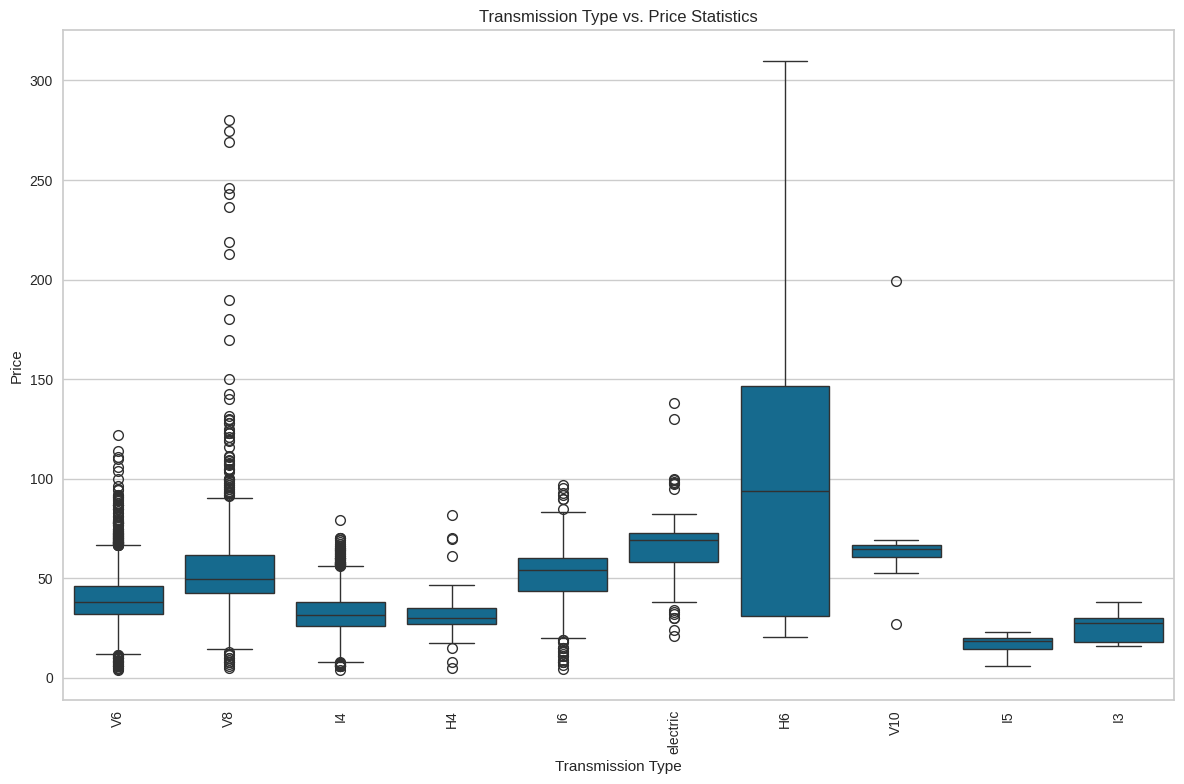

In [229]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cylindder_Arrangement', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Transmission Type vs. Price Statistics')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

 # Create Columns

In [230]:
df["Make-Model"] = df["Make"] + " " + df["Model"]

In [231]:
make_counts = df["Make"].value_counts()

In [232]:
rare_make = make_counts[make_counts < 100].index

# Bu değerleri "Other" olarak yeniden kategorize edin
df['Make'] = df['Make'].apply(lambda x: 'Other' if x in rare_make else x)


In [233]:
rare_make

Index(['Alfa', 'Chrysler', 'Jaguar', 'Mitsubishi', 'Genesis', 'Maserati',
       'Lamborghini', 'MINI', 'Scion', 'Mercury', 'FIAT', 'Bentley', 'Saturn'],
      dtype='object', name='Make')

In [ ]:
df["Make"].value_counts()

BMW              835
Mercedes-Benz    736
Toyota           711
Honda            616
Ford             518
Jeep             457
Lexus            442
Chevrolet        380
Audi             348
Subaru           254
Cadillac         250
Nissan           232
Kia              214
GMC              213
Acura            206
Hyundai          200
INFINITI         190
Mazda            172
Other            166
Land             154
Tesla            142
RAM              135
Dodge            129
Volkswagen       127
Volvo            127
Porsche          112
Lincoln          110
Buick            103
Name: Make, dtype: int64

In [234]:
model_count = df.groupby("Make")["Model"].count().reset_index()
model_count.columns = ["Make", "Count_of_model"]

# df veri çerçevenize "Count_of_model" sütununu ekleyin
df = pd.merge(df, model_count, on="Make", how="left")

In [235]:
df.drop(columns=['Make-Model'], inplace=True)


In [236]:
year_of_age = 2024 - df.Year
df["year_of_age"] = year_of_age

In [54]:
df.to_csv("new_df.csv", index=False)

<Figure size 1200x600 with 0 Axes>

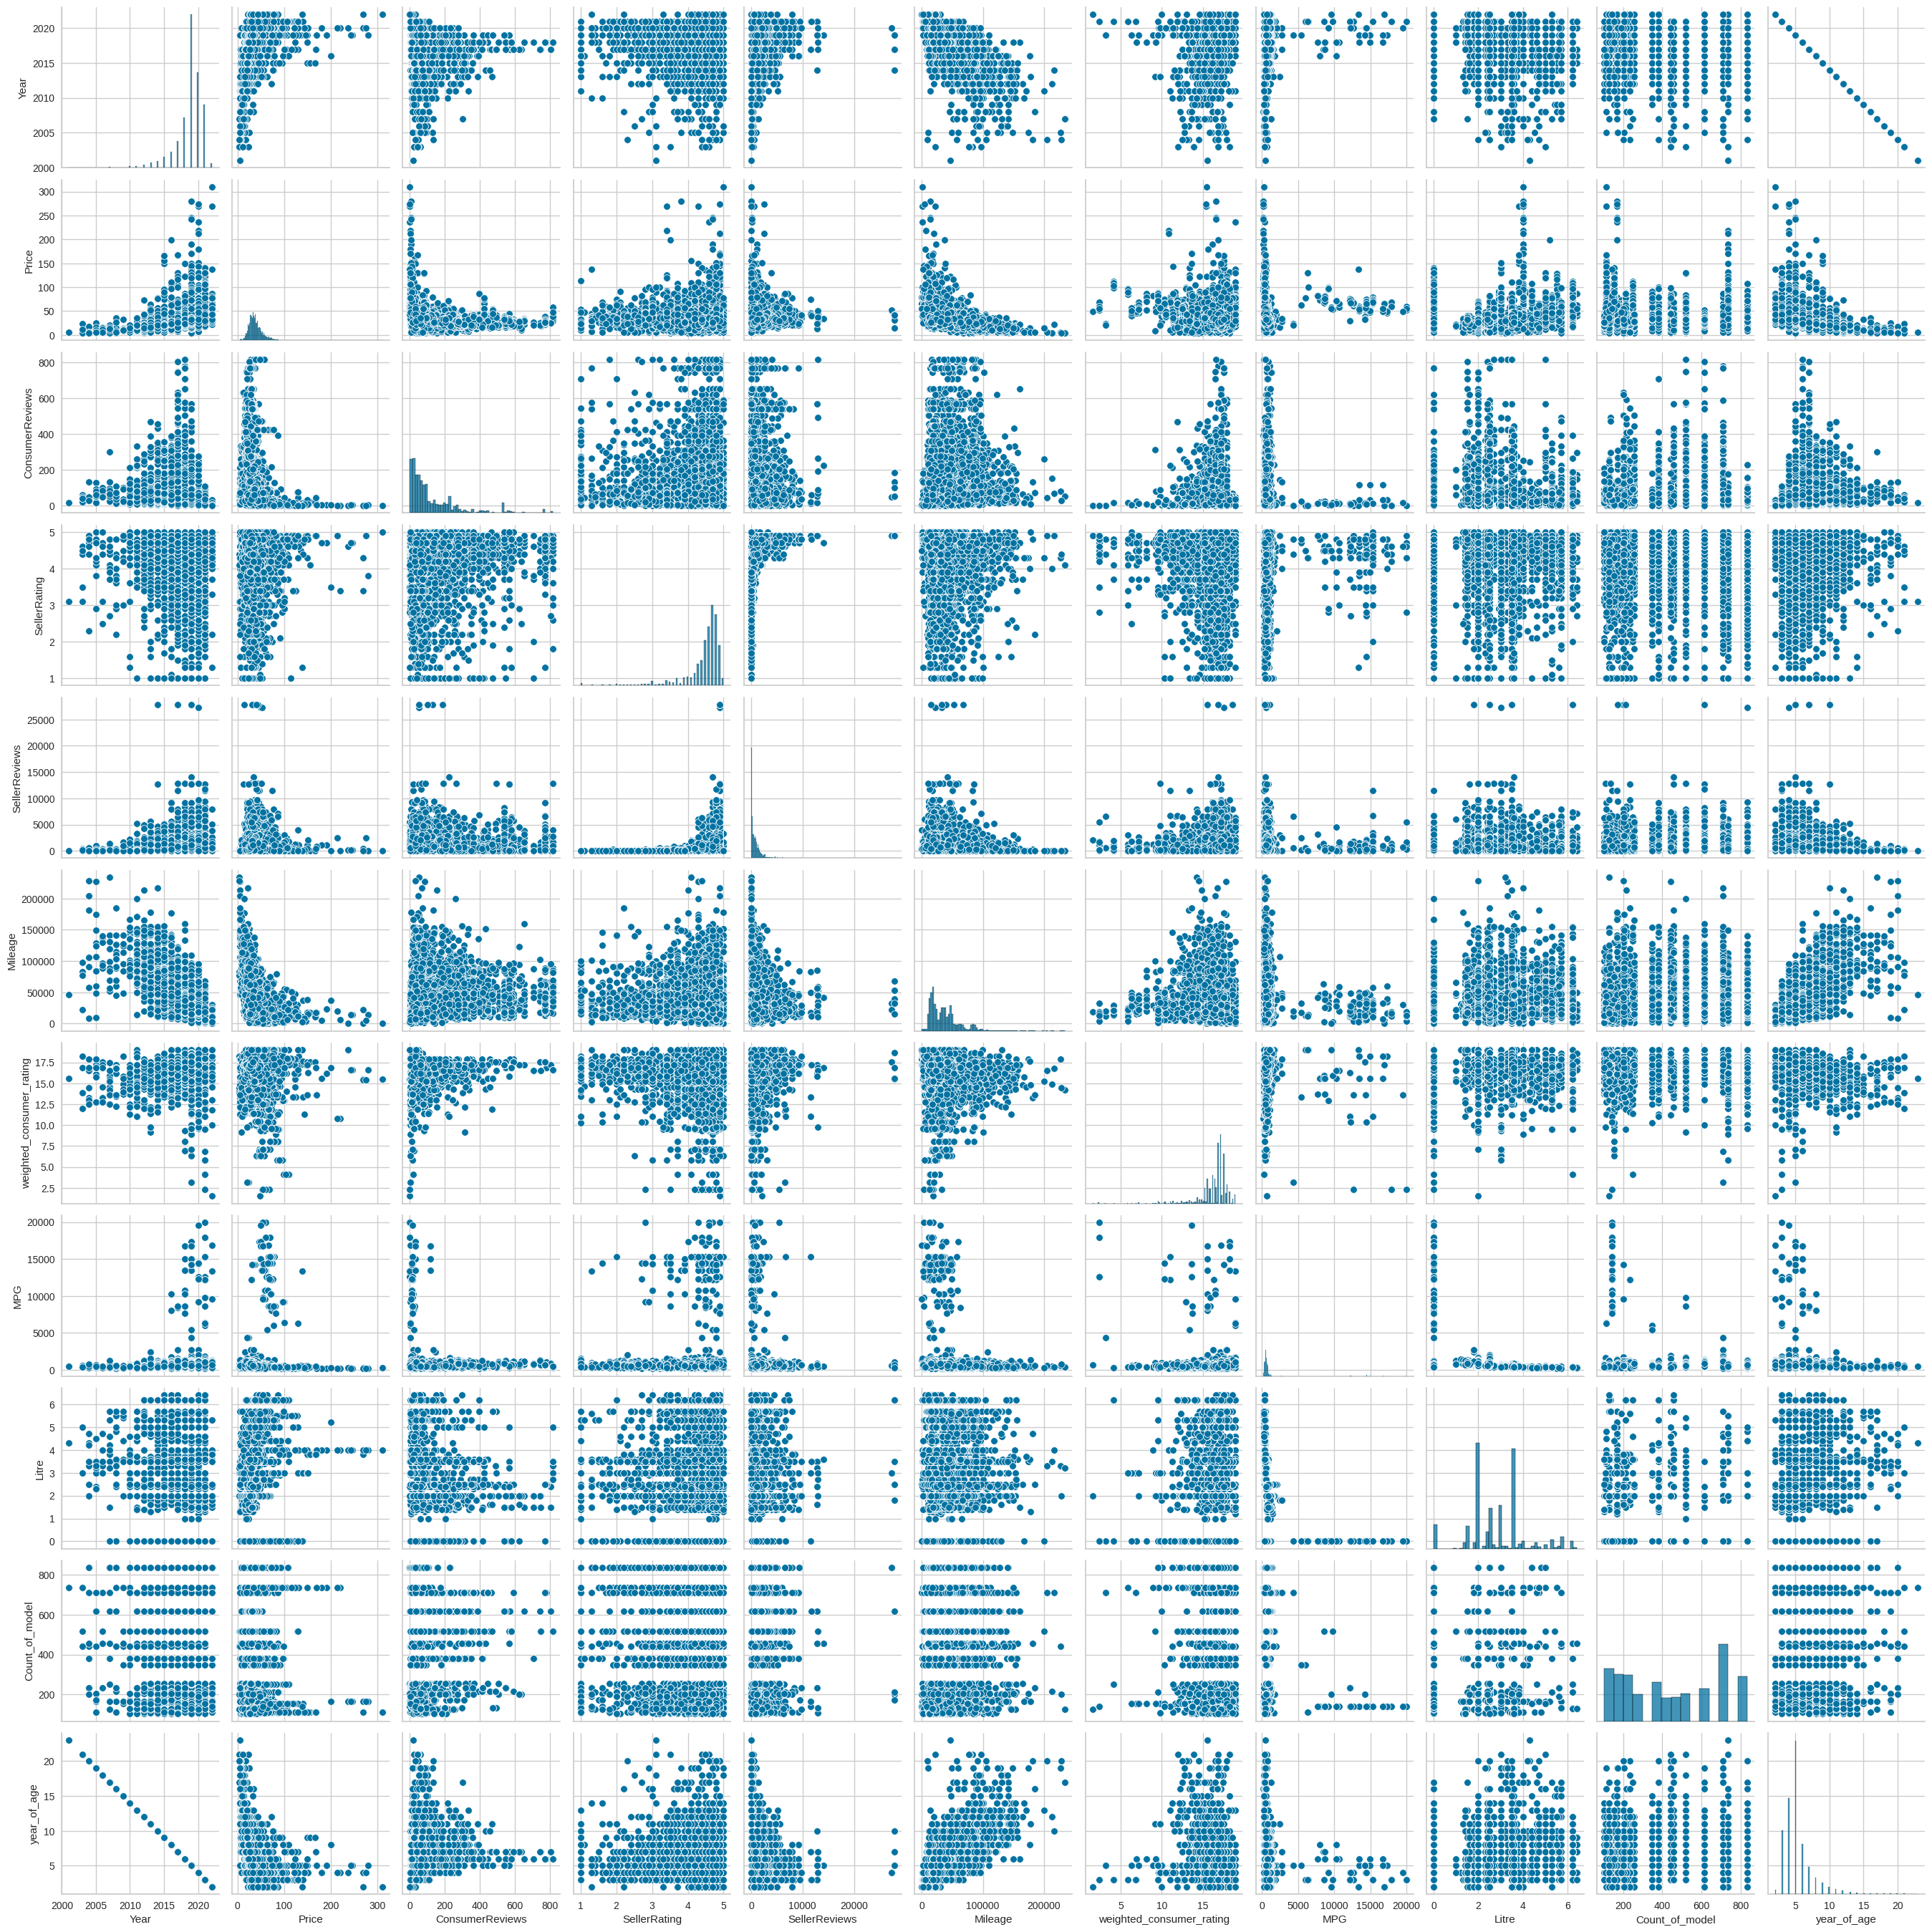

In [55]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, palette="Dark2")

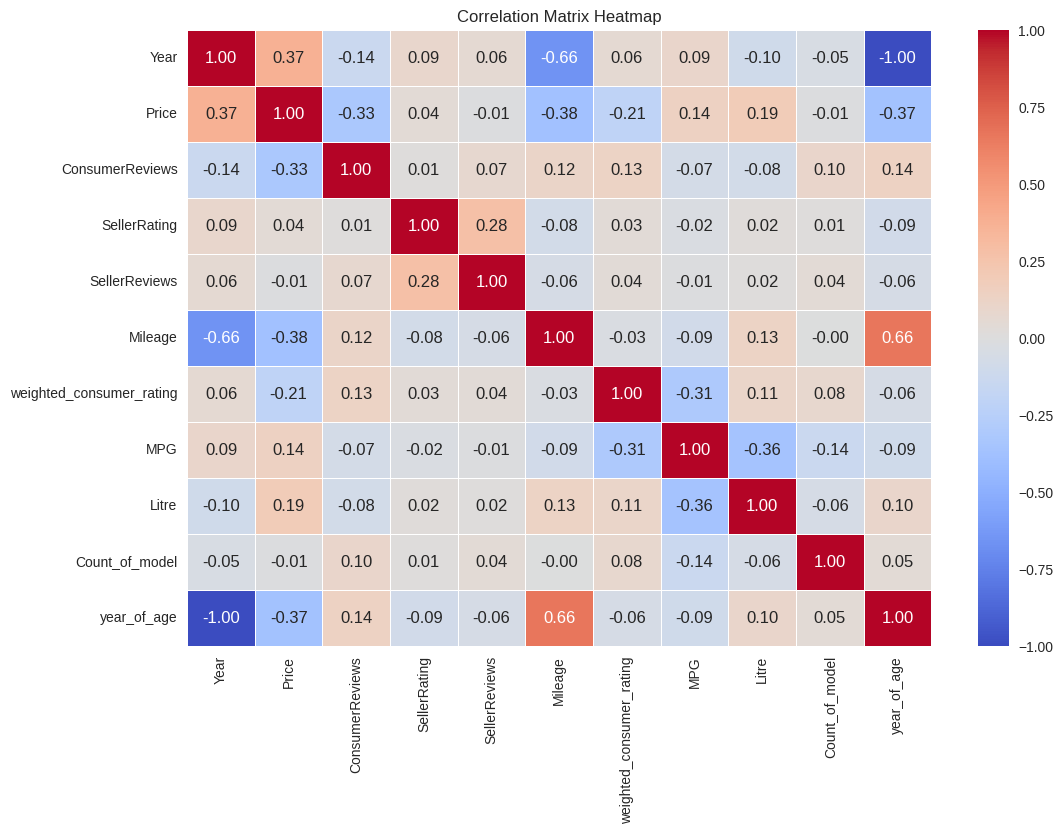

In [56]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [237]:
from sklearn.decomposition import PCA  #modele dezavantaj var tahminleme sonucunda
from sklearn.preprocessing import StandardScaler

# Veriyi ölçeklendirme
features = ['Mileage', 'year_of_age']
x = df[features].values
x = StandardScaler().fit_transform(x)

# PCA uygulama
pca = PCA(n_components=1)
principal_component = pca.fit_transform(x)

# Yeni bileşeni DataFrame'e ekleme
df['Mileage_Year'] = principal_component


In [238]:
df.drop(['Mileage', 'year_of_age'], axis=1, inplace=True)

MinMPG: Şehir içi yakıt verimliliğini belirtir. Daha düşük değerler gösterir.
MaxMPG: Şehir dışı yakıt verimliliğini belirtir. Daha yüksek değerler gösterir.

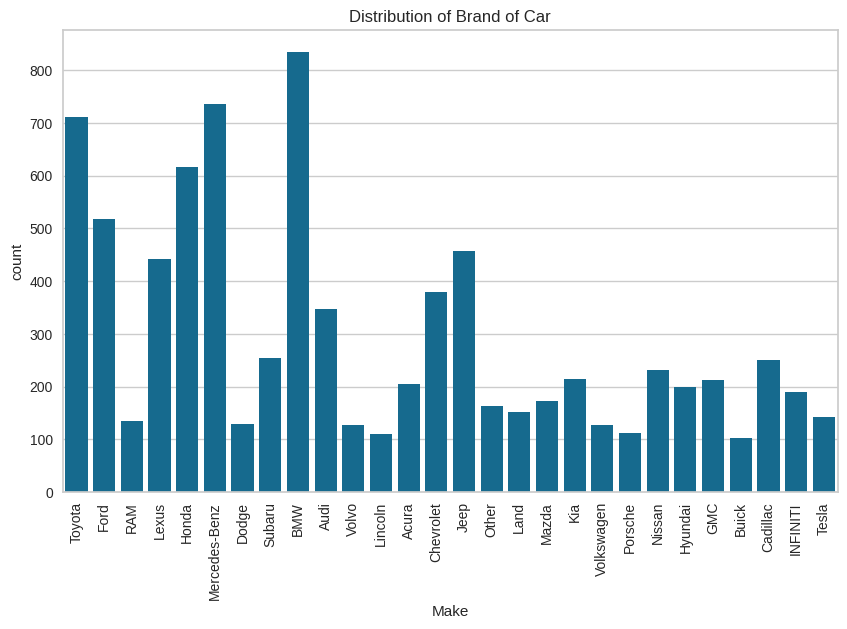

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Make')
plt.title(f'Distribution of Brand of Car')
plt.xticks(rotation=90)
plt.show()


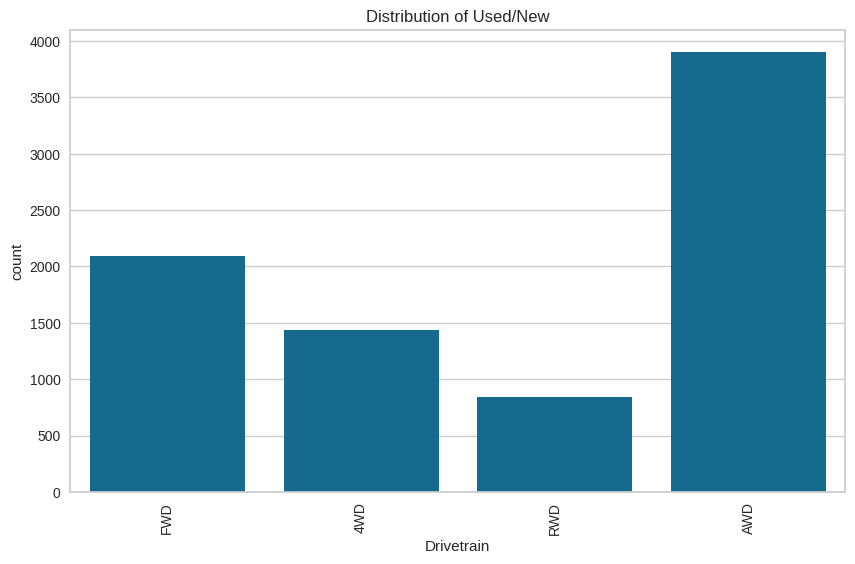

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Drivetrain')
plt.title(f'Distribution of Used/New')
plt.xticks(rotation=90)
plt.show()


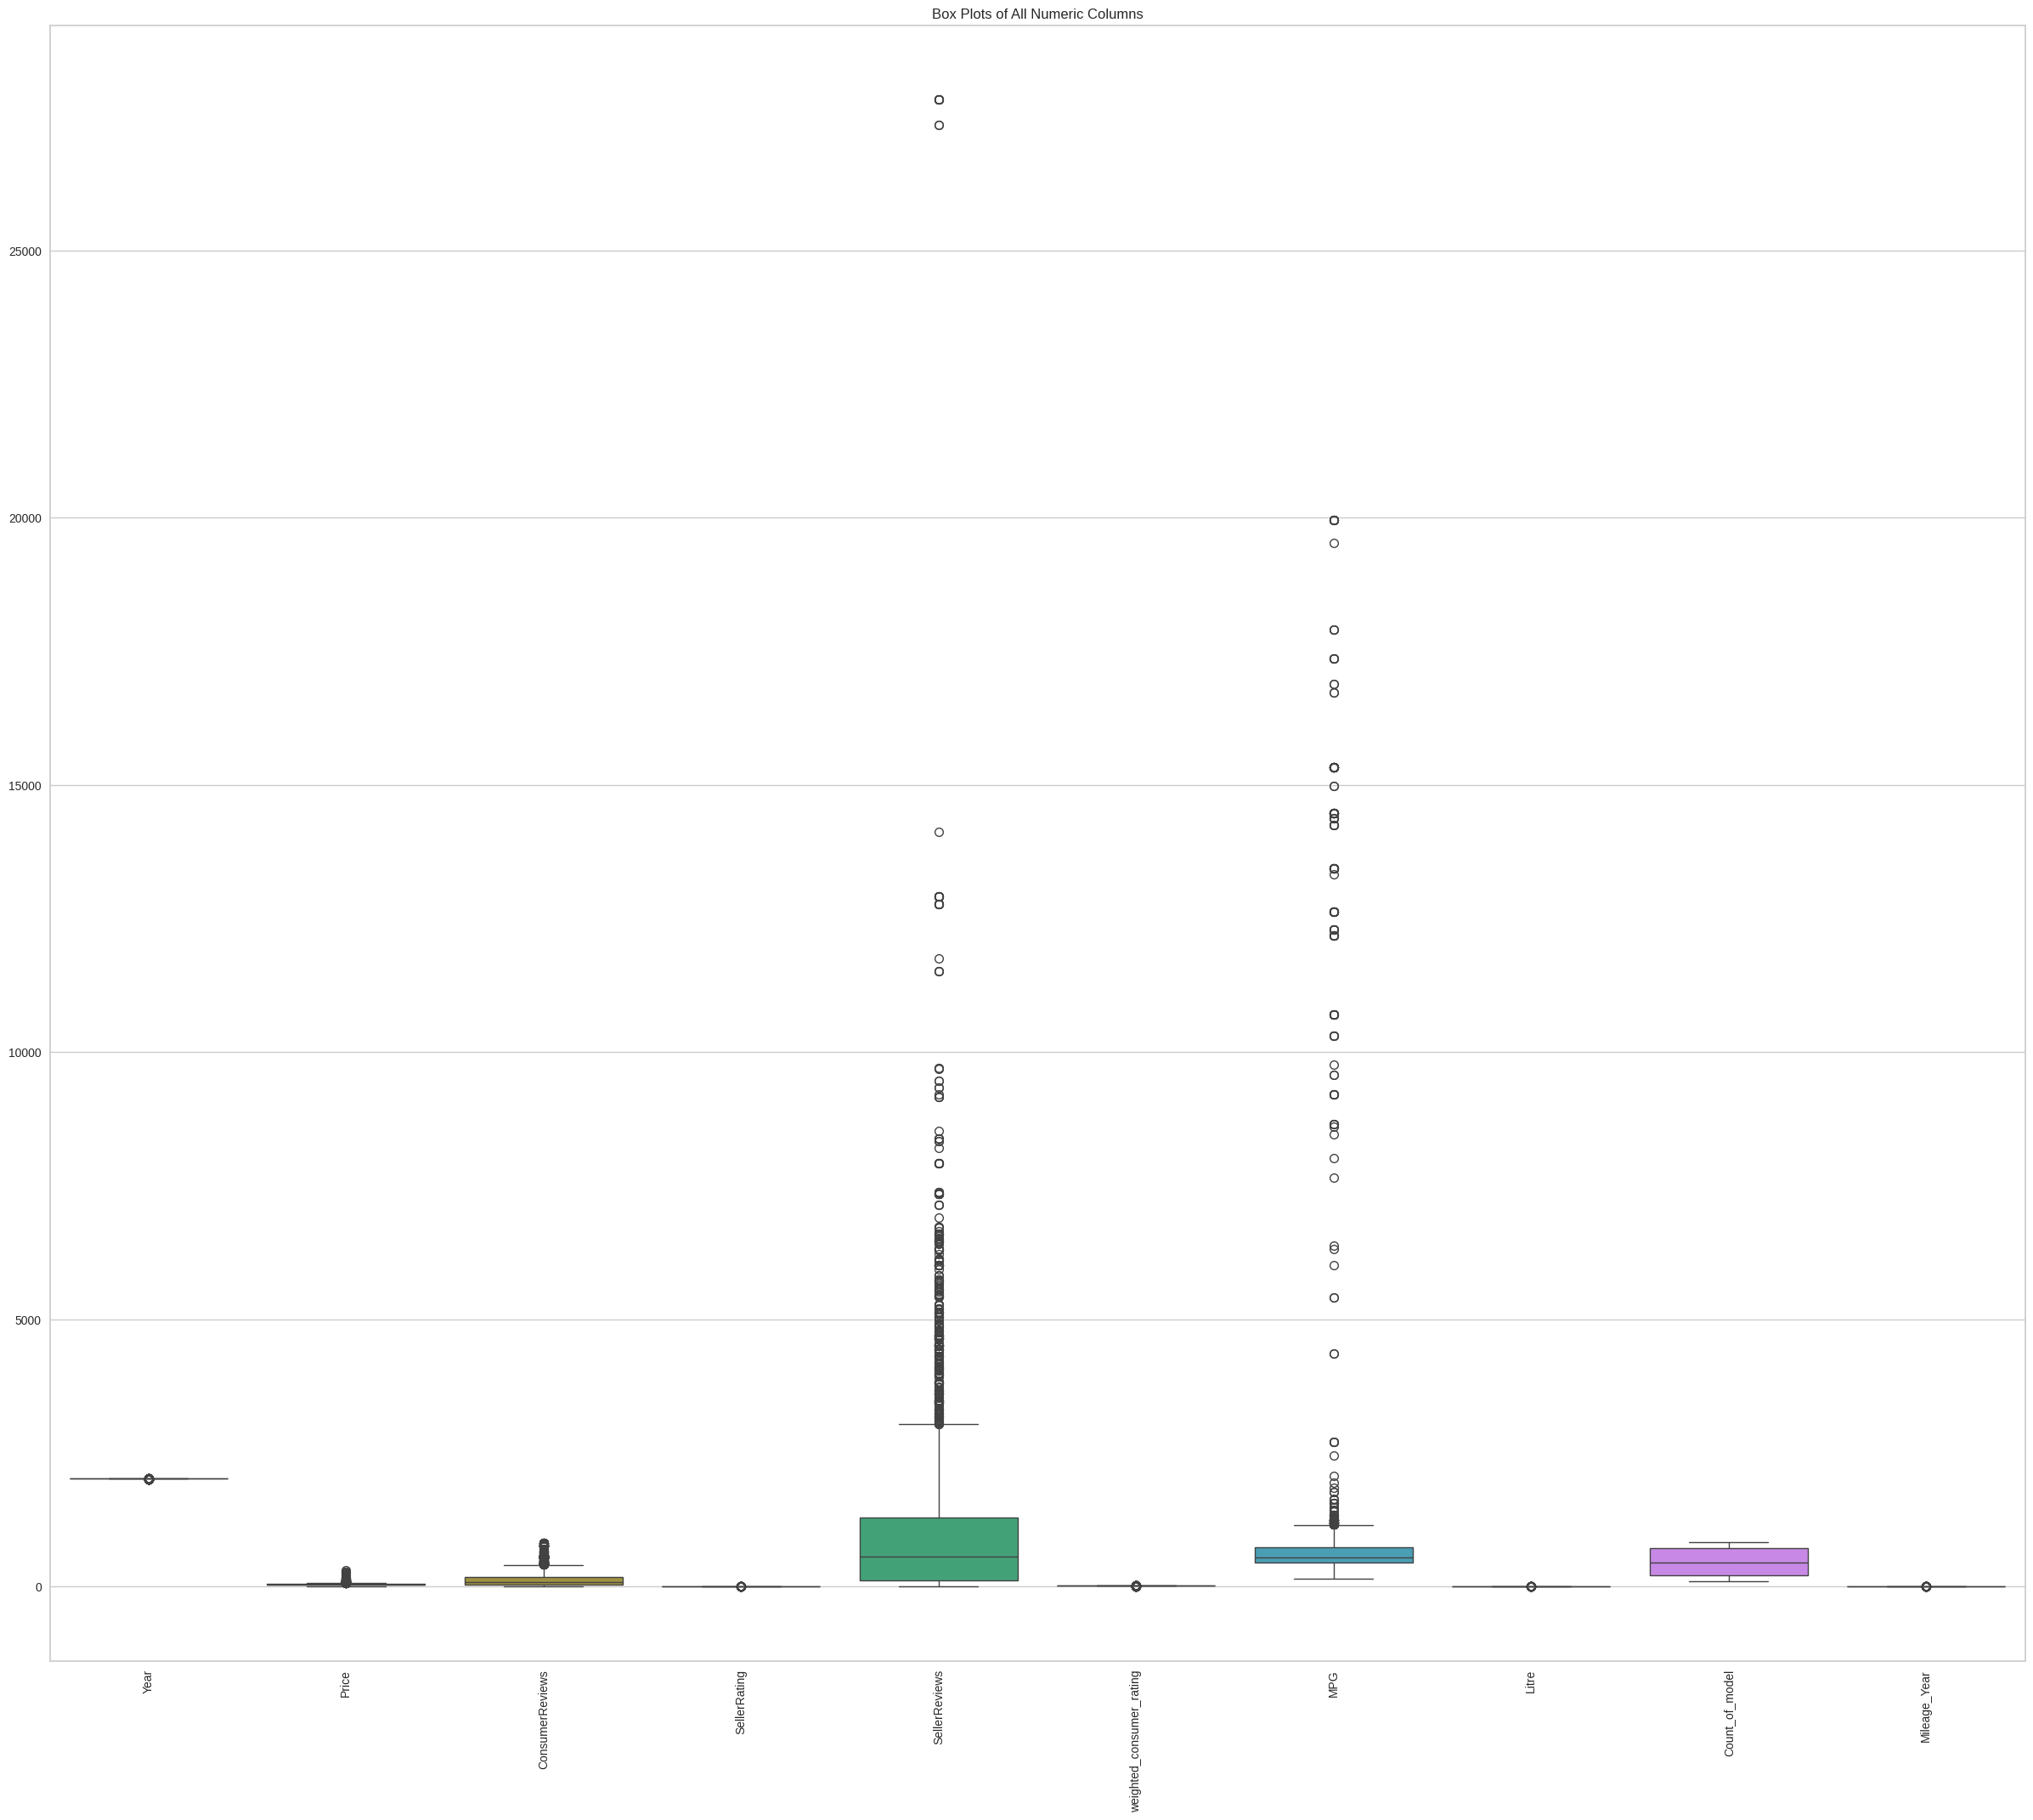

In [59]:
numeric_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(30, 25))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title('Box Plots of All Numeric Columns')
plt.show()


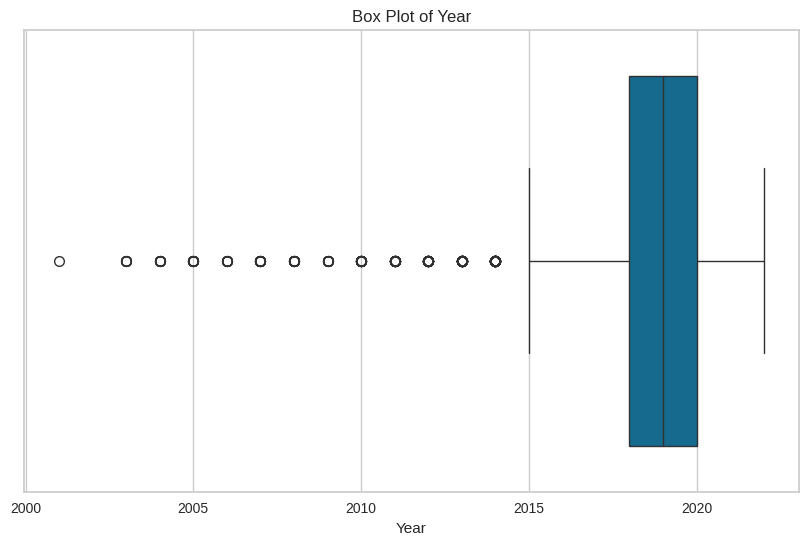

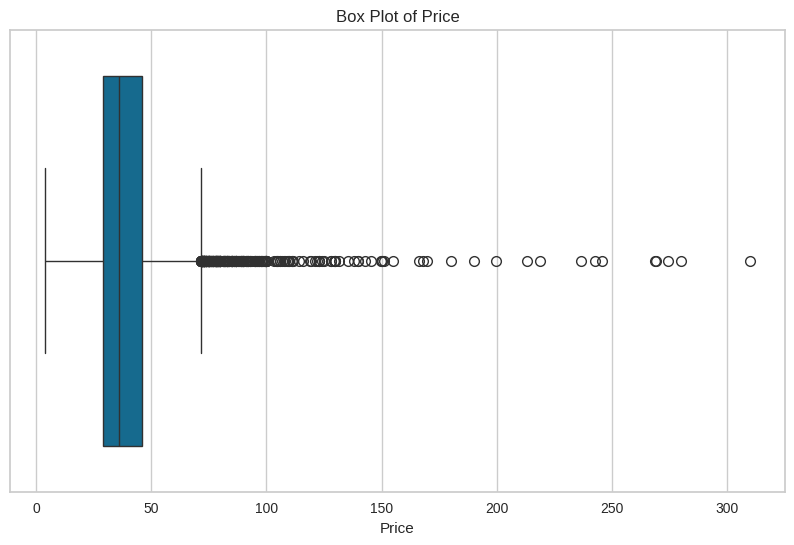

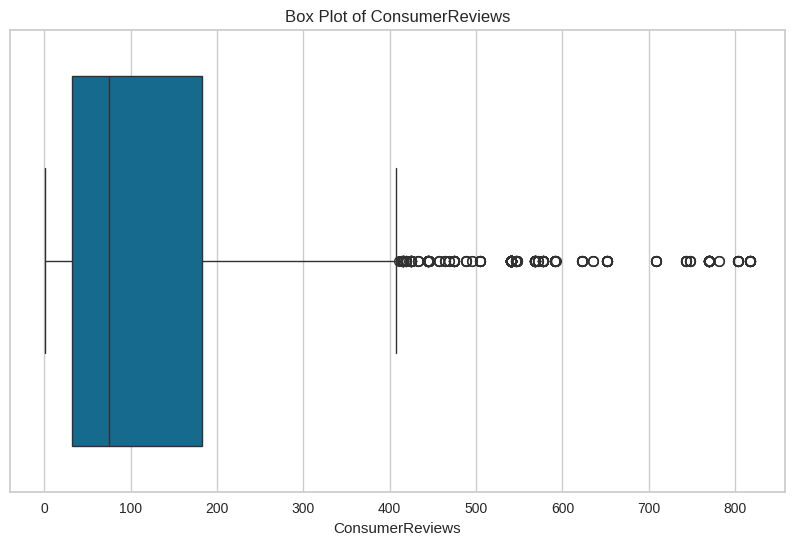

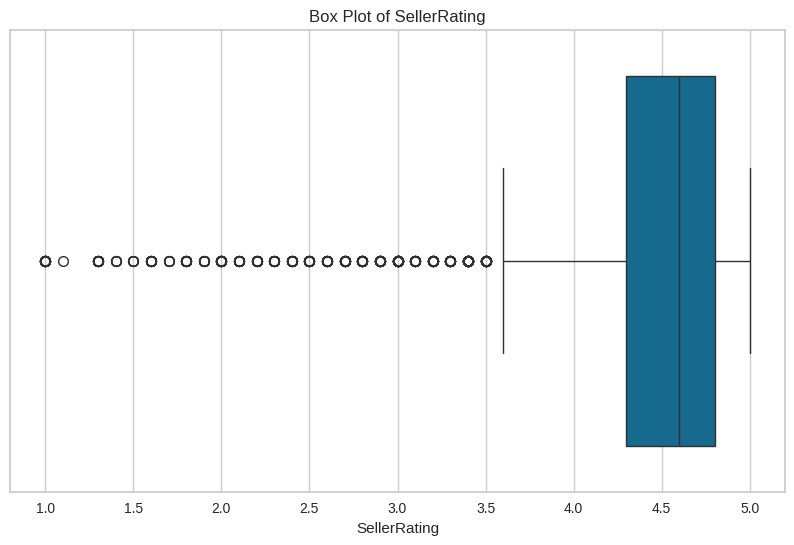

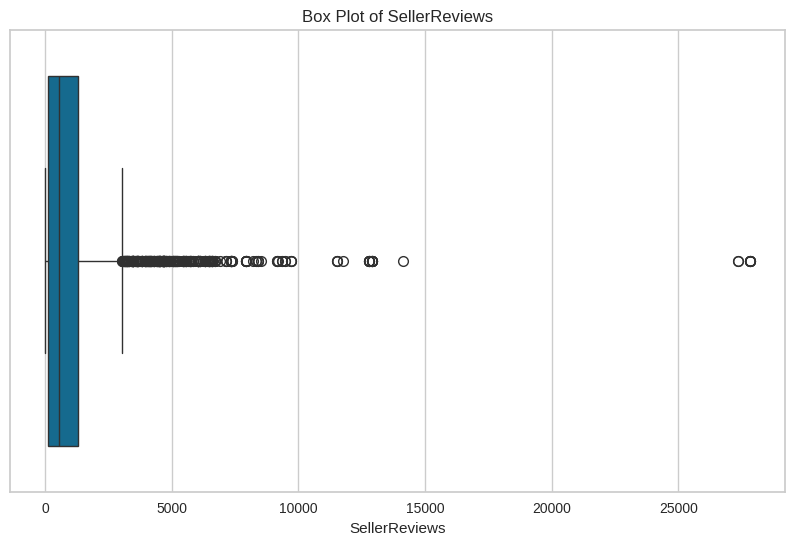

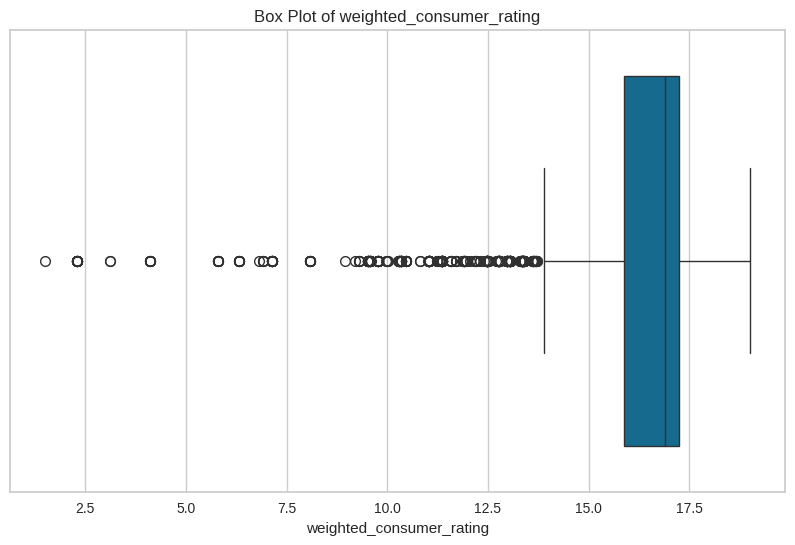

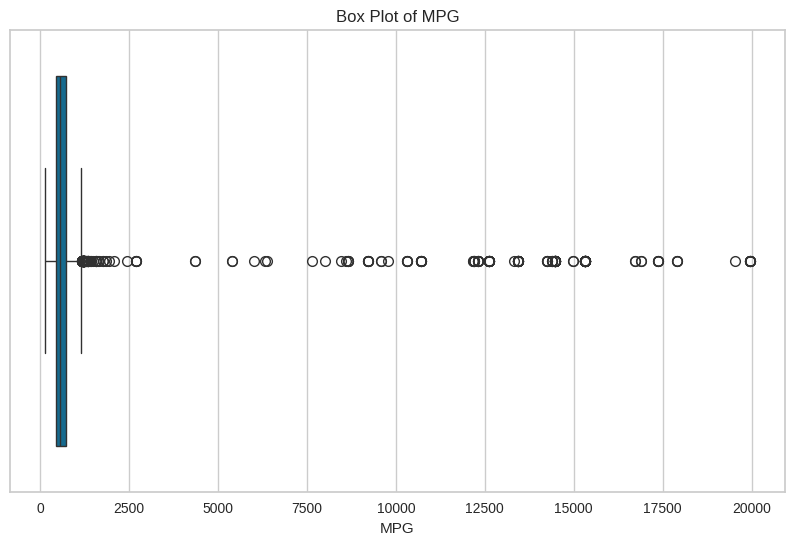

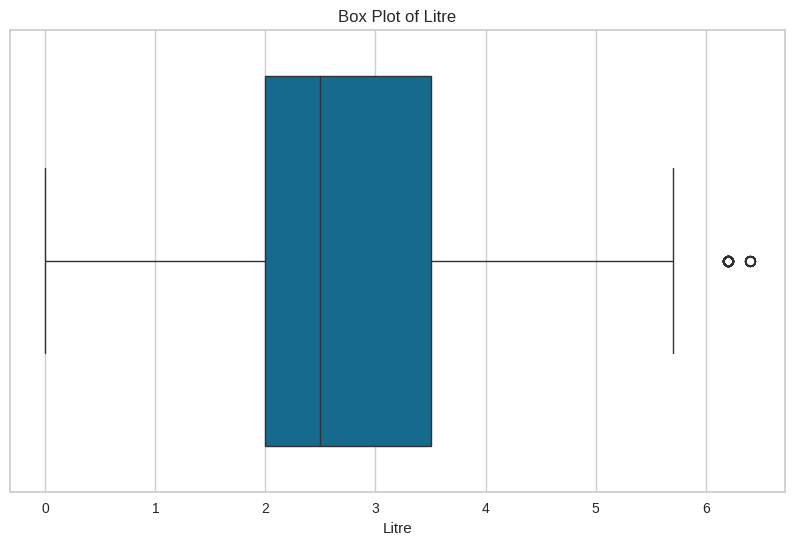

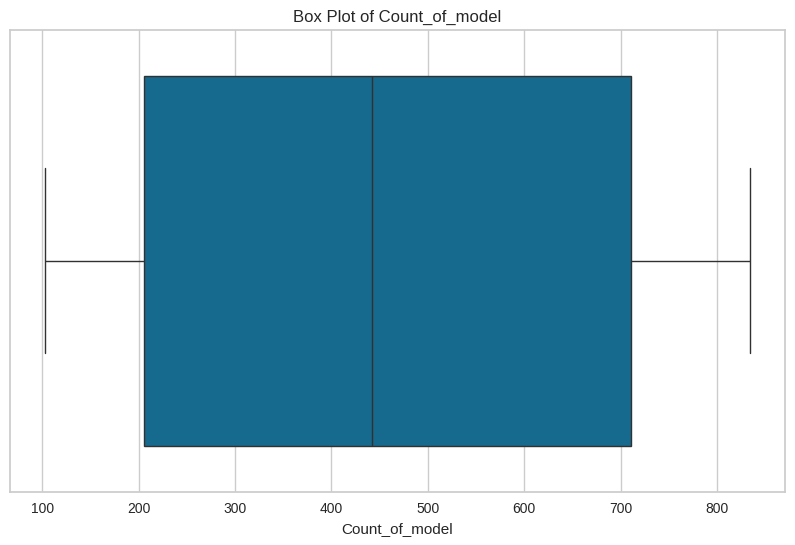

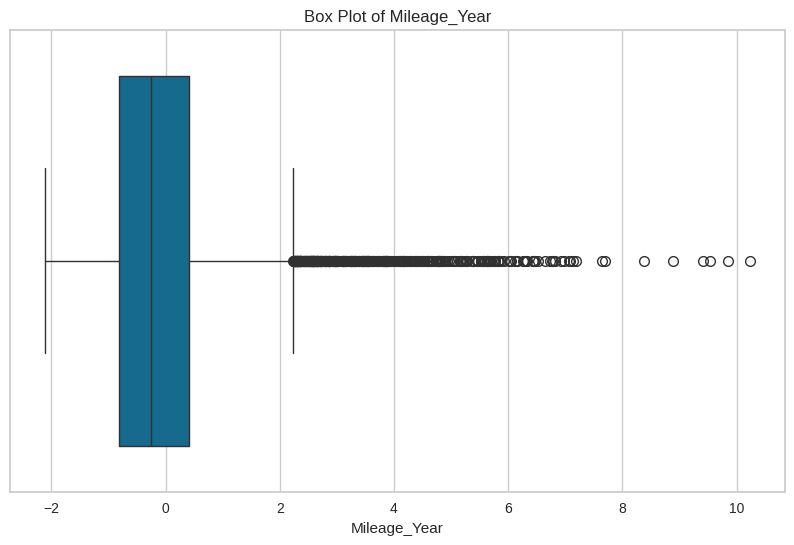

In [ ]:
#outlie durumöarını gözlemlediimizde Sellerreviews'de daha açık görüyoruz
numeric_cols = df.select_dtypes(include=['number']).columns

# Her bir sayısal sütun için box plot oluşturma
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


In [ ]:
df[df["SellerReviews"]>15000]  # 8 tane değer var. burda drop işlemi yapabiliriz outlier değerler için

Year     Make               Model Used/New   Price  ConsumerReviews  \
581   2020      BMW             X3 M40i     Used  49.999               51   
773   2020      BMW             X3 M40i     Used  51.995               51   
2552  2019    Mazda  CX-9 Grand Touring     Used  33.499               52   
3545  2017      GMC  Sierra 1500 Denali     Used  43.499              187   
4091  2014  Hyundai          Elantra SE     Used  13.999              132   
4323  2019    Honda       Passport EX-L     Used  34.399              102   
7657  2019    Mazda        CX-9 Touring     Used  31.399               52   
7658  2017      GMC  Sierra 1500 Denali     Used  40.995              187   

     SellerType                 SellerName  SellerRating  SellerReviews  \
581      Dealer  Off Lease Only Palm Beach           4.9          27351   
773      Dealer  Off Lease Only Palm Beach           4.9          27351   
2552     Dealer     Off Lease Only Orlando           4.9          27824   
3545     Dealer     Off Lease Only Orlando           4.9          27824   
4091     Dealer     Off Lease Only Orlando           4.9          27824   
4323     Dealer     Off Lease Only Orlando           4.9          27824   
7657     Dealer     Off Lease Only Orlando           4.9          27824   
7658     Dealer     Off Lease Only Orlando           4.9          27824   

                               StreetName State Zipcode DealType  \
581   1200 S Congress Ave West Palm Beach    FL   33406     Good   
773   1200 S Congress Ave West Palm Beach    FL   33406     Fair   
2552              8443 McCoy Road Orlando    FL   32822    Great   
3545              8443 McCoy Road Orlando    FL   32822    Great   
4091              8443 McCoy Road Orlando    FL   32822     Fair   
4323              8443 McCoy Road Orlando    FL   32822     Good   
7657              8443 McCoy Road Orlando    FL   32822    Great   
7658              8443 McCoy Road Orlando    FL   32822    Great   

                ExteriorColor   InteriorColor Drivetrain  FuelType  \
581   Black Sapphire Metallic          Cognac        AWD  Gasoline   
773   Glacier Silver Metallic  Canberra Beige        AWD  Gasoline   
2552   Deep Crystal Blue Mica           Black        FWD  Gasoline   
3545               Onyx Black       Jet Black        4WD  Gasoline   
4091             Venetian Red            Gray        FWD  Gasoline   
4323    Modern Steel Metallic           Black        AWD  Gasoline   
7657    Machine Gray Metallic            Sand        FWD  Gasoline   
7658     Quicksilver Metallic       Jet Black        4WD  Gasoline   

                    VIN    Stock# Transmission_Type Speed_Type  \
581   5UXTY9C06L9B58334   C366396              auto        8.0   
773   5UXTY9C09LLE60218   T355872              auto        8.0   
2552  JM3TCADY5K0312593  P364004B              auto        6.0   
3545  3GTU2PEJXHG442359   O365276              auto        8.0   
4091  5NPDH4AE3EH470559  O366426A              auto        6.0   
4323  5FNYF8H59KB020302   O367745              auto        9.0   
7657  JM3TCACY5K0316161   O367538              auto        6.0   
7658  3GTU2PEJXHG476267  P359710A              auto        8.0   

      weighted_consumer_rating   MPG State_1  Litre Cylindder_Arrangement  \
581                     17.591   567      FL    3.0                    I6   
773                     17.591   567      FL    3.0                    I6   
2552                    18.650   616      FL    2.5                    I4   
3545                    15.548   315      FL    6.2                    V8   
4091                    15.525  1064      FL    1.8                    I4   
4323                    16.866   456      FL    3.5                    V6   
7657                    18.650   616      FL    2.5                    I4   
7658                    15.548   315      FL    6.2                    V8   

      Count_of_model  Mileage_Year  
581              834     -0.546291  
773              834     -0.8

In [239]:
value_counts = df['SellerReviews'].value_counts()

to_drop = value_counts[value_counts < 2].index

# to_drop listesindeki indekslere sahip satırları düşürür
df = df[~df['SellerReviews'].isin(to_drop)]

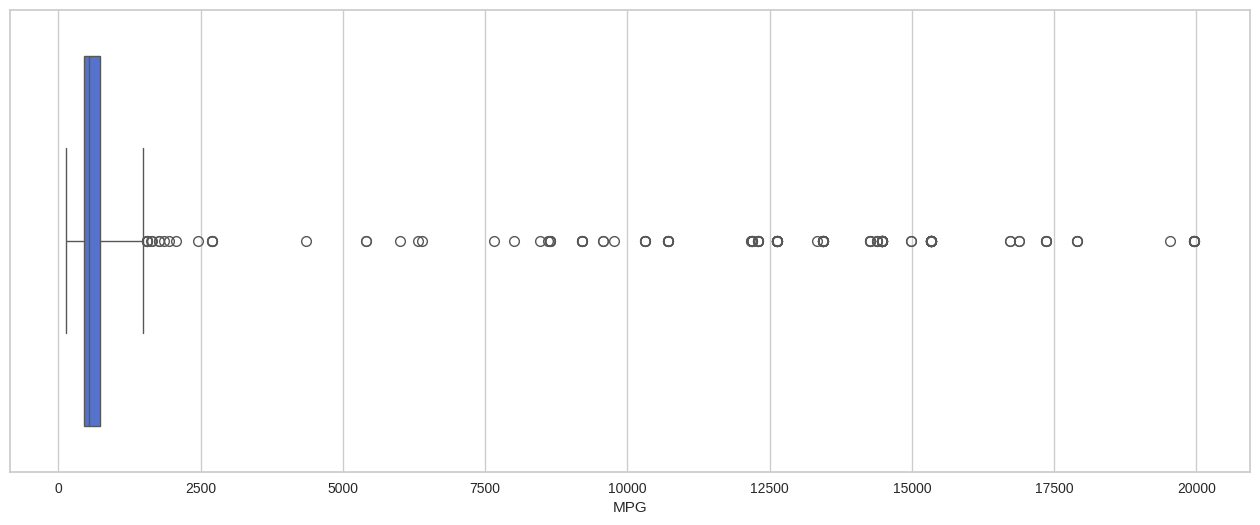

In [240]:
plt.figure(figsize=(16,6))
sns.boxplot(x="MPG", data=df, whis=3, color="royalblue")
plt.show()

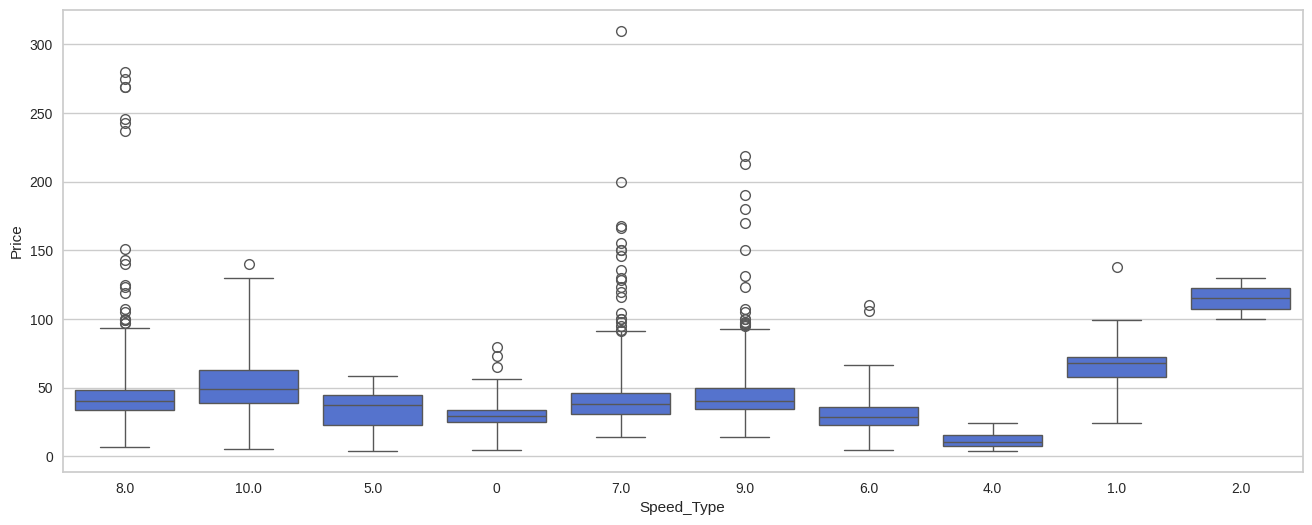

In [67]:
plt.figure(figsize=(16,6))
sns.boxplot(x="Speed_Type", y="Price", data=df, whis=3, color="royalblue")
plt.show()

In [248]:
df.drop(["Model", "SellerName", "StreetName", "VIN", "Stock#"], axis=1, inplace=True)

# Encode

In [69]:
# kategorik verilerde unique değerlere baktık
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())# col<20: çıktının daha okunabilri hale gelmesi için

Make                : 28
Used/New            : 2
SellerType          : 2
State               : 58
Zipcode             : 1963
DealType            : 3
ExteriorColor       : 899
InteriorColor       : 342
Drivetrain          : 4
FuelType            : 5
Transmission_Type   : 3
Speed_Type          : 10
Cylindder_Arrangement: 10


In [70]:
df["SellerType"].value_counts()  # burda baya yetersiz bir durum söz konusu öğrenmesi için pek sağlıklı değil

SellerType
Dealer     7796
Private      26
Name: count, dtype: int64

In [71]:
df.Transmission_Type.value_counts() #7bine karşı diğerleri...

Transmission_Type
auto     6708
cvt      1078
other      36
Name: count, dtype: int64

In [ ]:
df[df.Speed_Type == "1"]

Year     Make Used/New   Price  ConsumerReviews SellerType  \
146   2020    Tesla     Used  65.995               10     Dealer   
154   2021    Tesla     Used  71.277               15     Dealer   
160   2020    Tesla     Used  73.992               10     Dealer   
181   2021    Tesla     Used  65.786                1     Dealer   
257   2021    Tesla     Used  74.799               15     Dealer   
...    ...      ...      ...     ...              ...        ...   
8021  2018    Tesla     Used  76.498               15     Dealer   
8023  2019  Hyundai     Used  31.975               13     Dealer   
8120  2020    Tesla     Used  64.990               10     Dealer   
8156  2018    Tesla     Used  82.350               15     Dealer   
8258  2019    Tesla     Used  54.998               33     Dealer   

      SellerRating  SellerReviews State Zipcode DealType       ExteriorColor  \
146            3.4            472    NY   10475    Great                Blue   
154            4.8           3306    NH   03103     Good   Pearl White Multi   
160            4.6            143    CA   95020     Good               White   
181            4.5             62    TX   75070     Good   Pearl White Multi   
257            4.7            507    TX   78230     Good   Pearl White Multi   
...            ...            ...   ...     ...      ...                 ...   
8021           4.5            166    CA   94560     Good     Silver Metallic   
8023           4.8           1105    AZ   85284     Good       Galactic Gray   
8120           4.4            333    TX   75006     Good               Black   
8156           4.9           3110    MD   20879     Fair  Deep Blue Metallic   
8258           4.8            944    DE   19806     Good           Red Multi   

      InteriorColor Drivetrain  FuelType Transmission_Type Speed_Type  \
146               –        AWD  Electric              auto          1   
154   White / Black        AWD  Electric              auto          1   
160   White / Black        AWD  Electric              auto          1   
181   White / Black        AWD  Gasoline              auto          1   
257   White / Black        AWD  Electric              auto          1   
...             ...        ...       ...               ...        ...   
8021          Black        AWD  Electric              auto          1   
8023          Black        FWD  Electric              auto          1   
8120          Black        AWD  Electric              auto          1   
8156          Black        AWD  Electric              auto          1   
8258          Black        RWD  Electric              auto          1   

      weighted_consumer_rating    MPG State_1  Litre Cylindder_Arrangement  \
146                     10.350  14478      NY    0.0              Electric   
154                     11.042  15327   Other    0.0              Electric   
160                     10.350  14478      CA    0.0              Electric   
181                      2.300  12626      TX    0.0                   V10   
257                     11.042  12190      TX    0.0              Electric   
...                        ...    ...     ...    ...                   ...   
8021                    13.691   8645      CA    0.0              Electric   
8023                    17.568  14256      AZ    0.0              Electric   
8120                    10.350  14478      TX    0.0              Electric   
8156                    13.691   7654      MD    0.0              Electric   
8258                    18.270  16728   Other    0.0              Electric   

      Count_of_model  dt_4WD  dt_AWD  dt_FWD  dt_RWD  dt_Diesel  dt_Electric  \
146              142       0       1       0       0          0            1   
154              142       0       1       0       0          0            1   
160              142       0       1       0       0          0            1   
181              142       0       1       0       0          0            0   
257           

In [241]:
df = df.join(df["Drivetrain"].str.get_dummies().add_prefix("dt_"))
df = df.join(df["FuelType"].str.get_dummies().add_prefix("ft_"))
df = df.join(df["Make"].str.get_dummies().add_prefix("mk_"))
df = df.join(df["Cylindder_Arrangement"].str.get_dummies().add_prefix("ca_"))
df = df.join(df["Speed_Type"].str.get_dummies().add_prefix("sp_"))
df = df.join(df["Transmission_Type"].str.get_dummies().add_prefix("Tt"))


In [242]:
label_encoder = LabelEncoder()

columns_to_encode = ['Used/New', 'SellerType', "DealType"]

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7822 entries, 0 to 8278
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      7822 non-null   int64  
 1   Make                      7822 non-null   object 
 2   Model                     7822 non-null   object 
 3   Used/New                  7822 non-null   int64  
 4   Price                     7822 non-null   float64
 5   ConsumerReviews           7822 non-null   int64  
 6   SellerType                7822 non-null   int64  
 7   SellerName                7822 non-null   object 
 8   SellerRating              7822 non-null   float64
 9   SellerReviews             7822 non-null   int64  
 10  StreetName                7822 non-null   object 
 11  State                     7822 non-null   object 
 12  Zipcode                   7822 non-null   object 
 13  DealType                  7822 non-null   int64  
 14  ExteriorColor

In [79]:
df.head(1)

Year    Make  Used/New   Price  ConsumerReviews  SellerType  SellerRating  \
0  2019  Toyota         1  39.998               45           0           3.3   

   SellerReviews State Zipcode  DealType ExteriorColor InteriorColor  \
0              3    CA   92562         2           Red         Black   

  Drivetrain  FuelType Transmission_Type Speed_Type  weighted_consumer_rating  \
0        FWD  Gasoline              auto        8.0                    15.856   

   MPG  Litre Cylindder_Arrangement  Count_of_model  Mileage_Year  dt_4WD  \
0  513    3.5                    V6             711     -0.301129       0   

   dt_AWD  dt_FWD  dt_RWD  ft_Diesel  ft_Electric  ft_Flex Fuel  ft_Gasoline  \
0       0       1       0          0            0             0            1   

   ft_Hybrid  mk_Acura  mk_Audi  mk_BMW  mk_Buick  mk_Cadillac  mk_Chevrolet  \
0          0         0        0       0         0            0             0   

   mk_Dodge  mk_Ford  mk_GMC  mk_Honda  mk_Hyundai  mk_INFINITI  mk_Jeep  \
0         0        0       0         0           0            0        0   

   mk_Kia  mk_Land  mk_Lexus  mk_Lincoln  mk_Mazda  mk_Mercedes-Benz  \
0       0        0         0           0         0                 0   

   mk_Nissan  mk_Other  mk_Porsche  mk_RAM  mk_Subaru  mk_Tesla  mk_Toyota  \
0          0         0           0       0          0         0          1   

   mk_Volkswagen  mk_Volvo  ca_H4  ca_H6  ca_I3  ca_I4  ca_I5  ca_I6  ca_V10  \
0              0         0      0      0      0      0      0      0       0   

   ca_V6  ca_V8  ca_electric  sp_0  sp_1.0  sp_10.0  sp_2.0  sp_4.0  sp_5.0  \
0      1      0            0     0       0        0       0       0       0   

   sp_6.0  sp_7.0  sp_8.0  sp_9.0  st_auto  st_cvt  st_other  Ttauto  Ttcvt  \
0       0       0       1       0        1       0         0       1      0   

   Ttother  
0        0

In [83]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
threshold = 0.8

# Yüksek korelasyonlu sütun çiftlerini bul
high_corr_pairs = np.where(np.abs(corr_matrix) > threshold)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

# Sonuçları yazdır
print("High correlation pairs (correlation > 0.8):")
for pair in high_corr_pairs:
    print(pair)


High correlation pairs (correlation > 0.8):
('MPG', 'ft_Electric')
('MPG', 'mk_Tesla')
('MPG', 'ca_electric')
('MPG', 'sp_1.0')
('ft_Electric', 'mk_Tesla')
('ft_Electric', 'ca_electric')
('ft_Electric', 'sp_1.0')
('mk_Subaru', 'ca_H4')
('mk_Tesla', 'ca_electric')
('mk_Tesla', 'sp_1.0')
('ca_electric', 'sp_1.0')
('sp_0', 'Ttauto')
('sp_0', 'Ttcvt')
('Ttauto', 'Ttcvt')


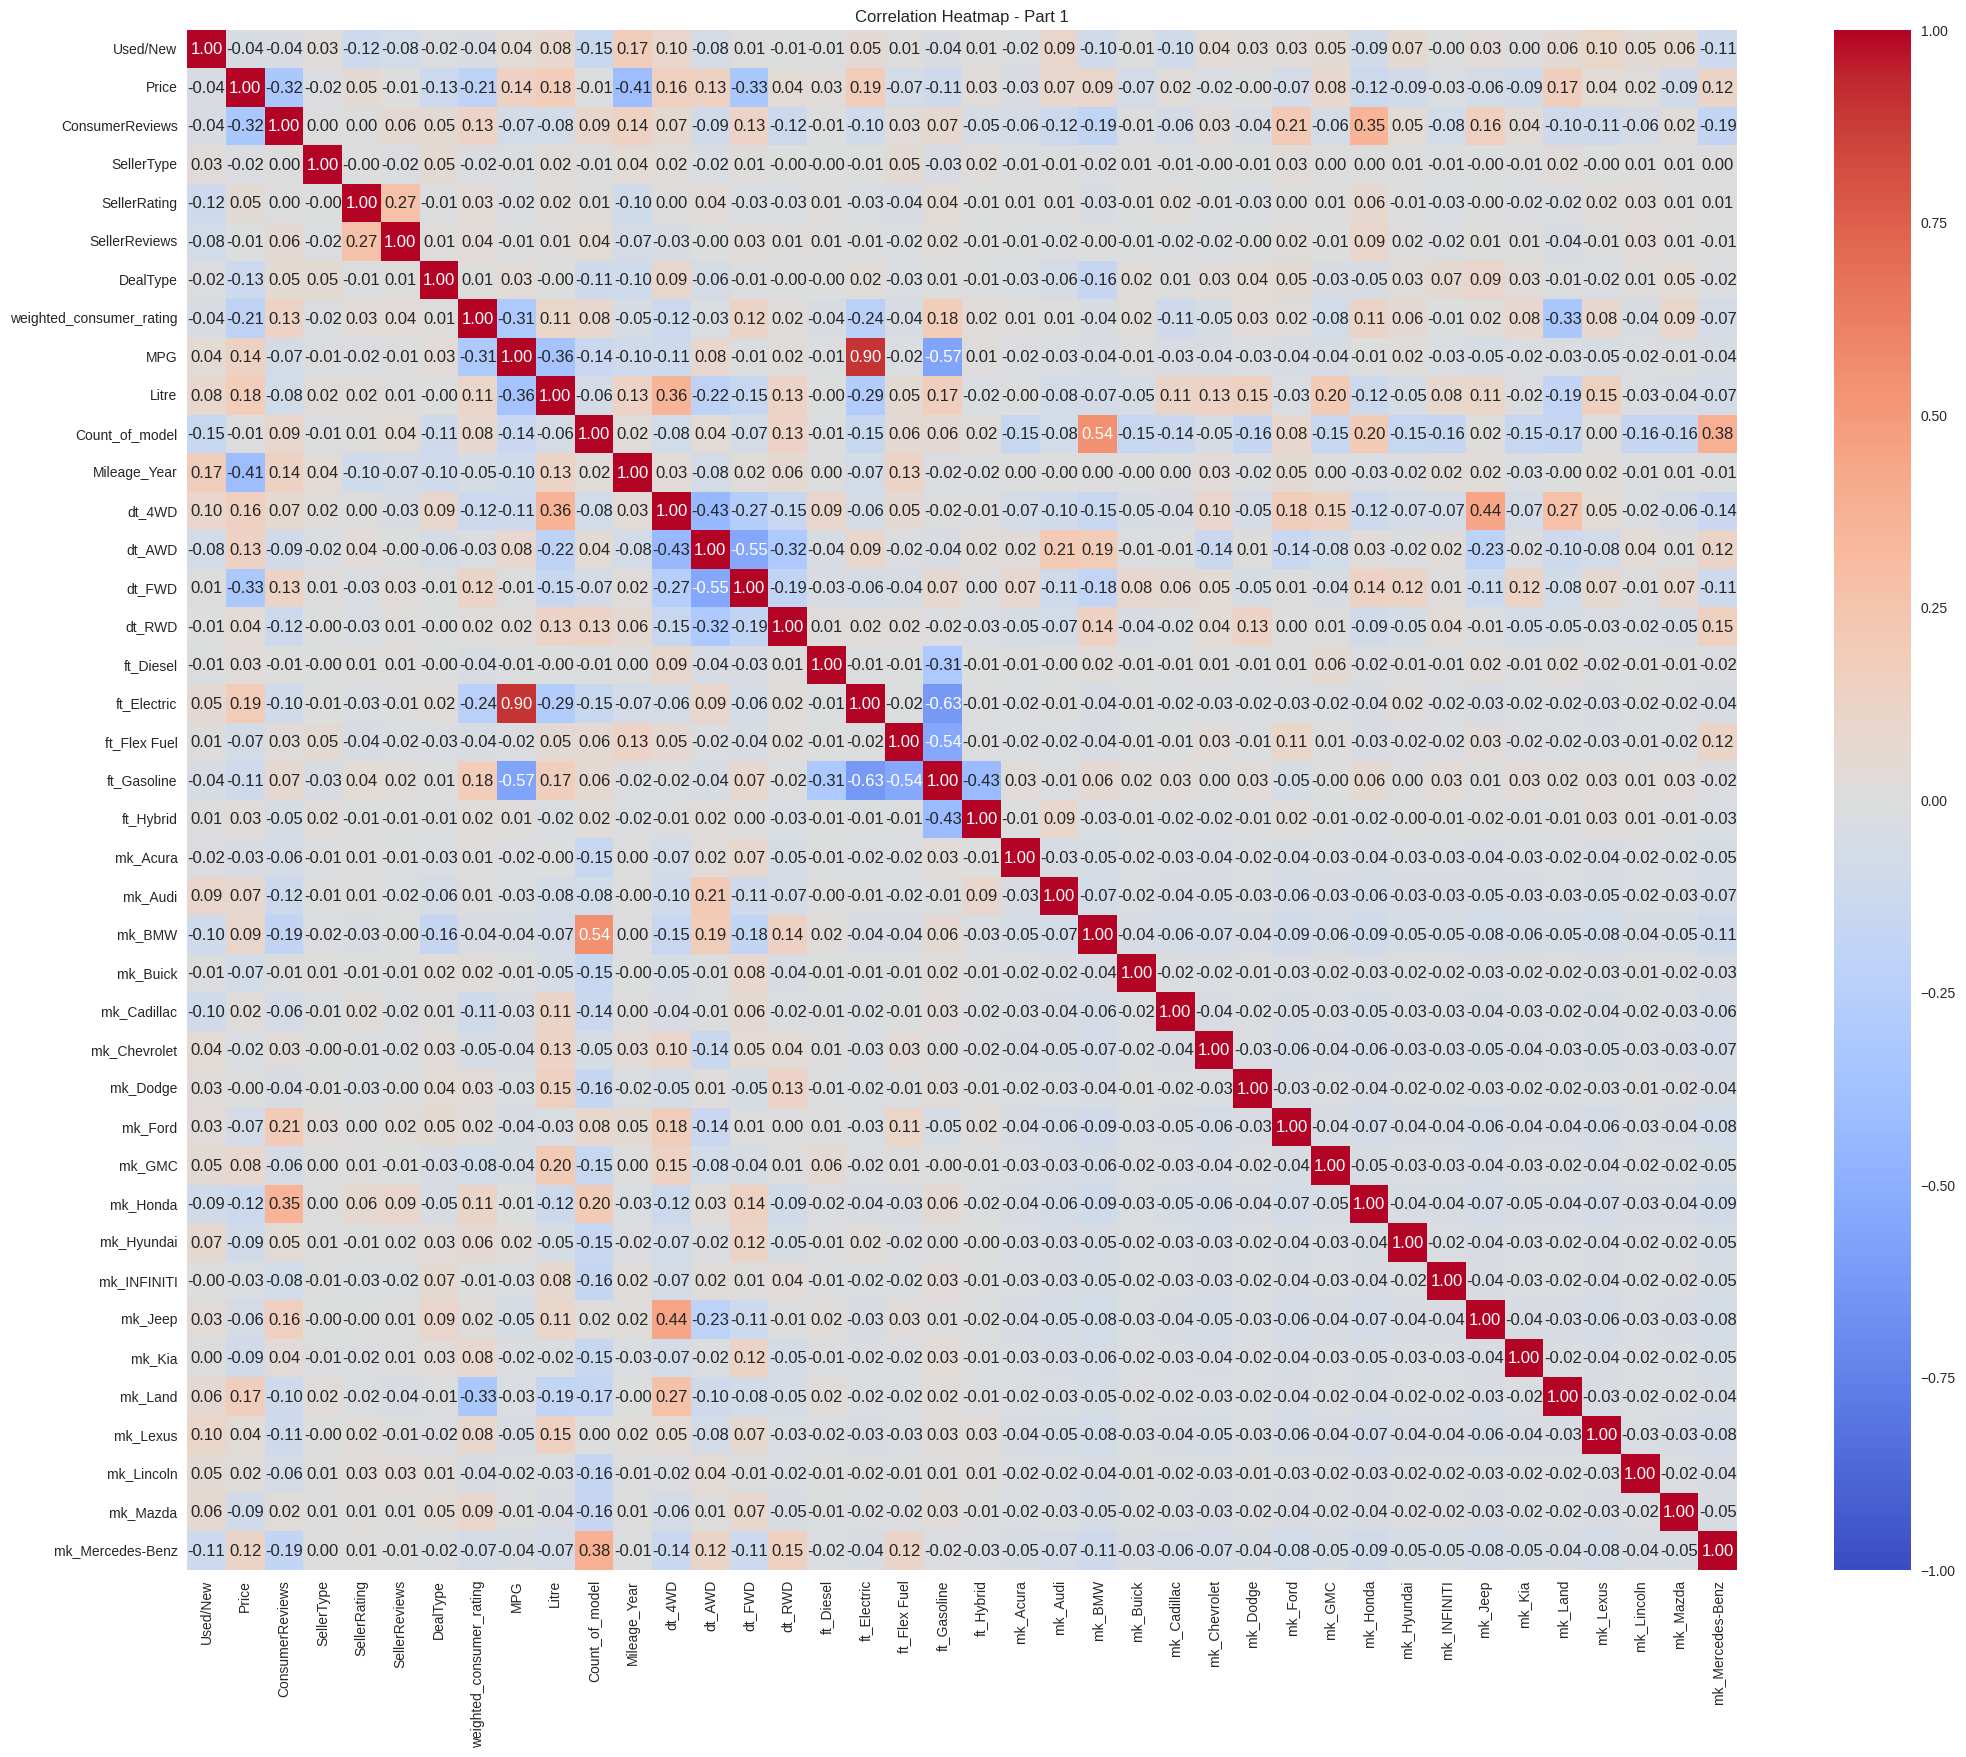

In [85]:
numeric_df = df.select_dtypes(include=['number'])

cols_part1 = numeric_df.columns[:40]  # First 40 columns
#cols_part2 = numeric_df.columns[40:]  # Remaining columns

plt.figure(figsize=(25, 20))
sns.heatmap(df[cols_part1].corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap - Part 1')
plt.show()


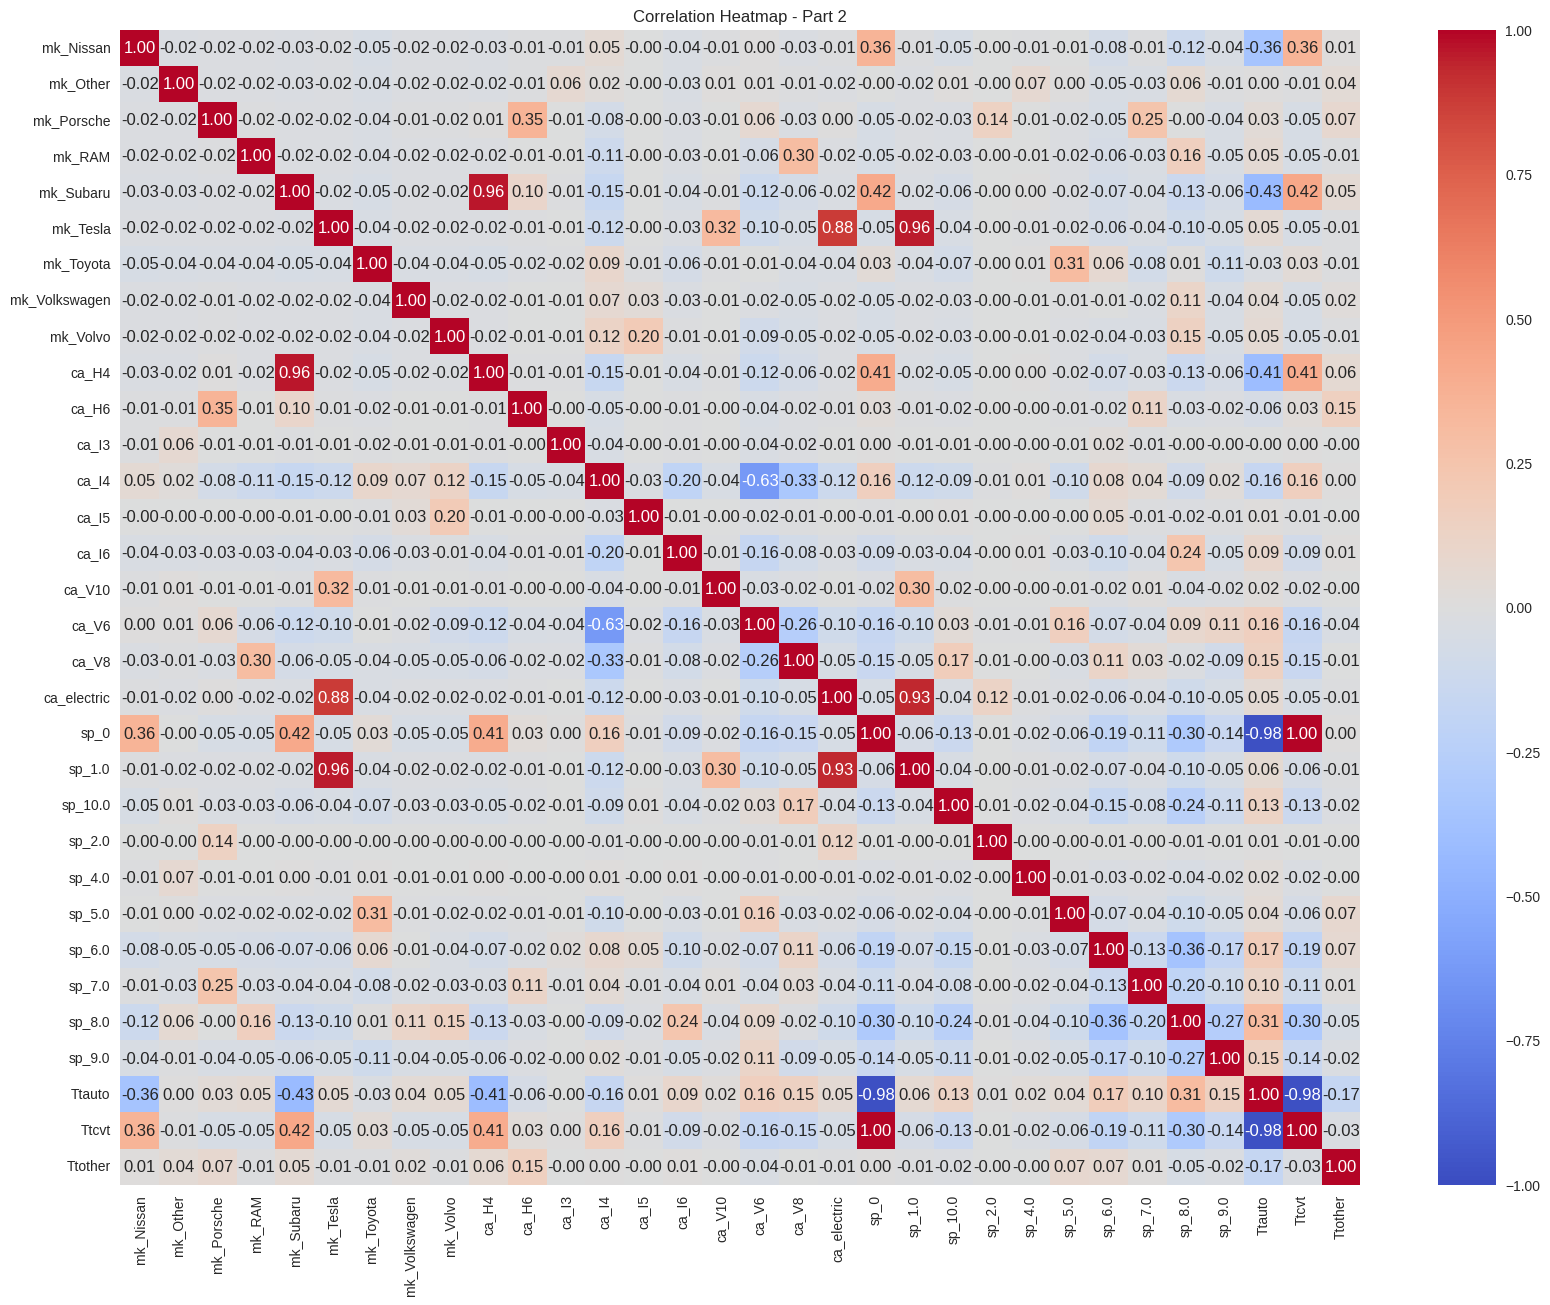

In [84]:
numeric_df = df.select_dtypes(include=['number'])

cols_part2 = numeric_df.columns[40:]  # Remaining columns

plt.figure(figsize=(20, 15))
sns.heatmap(df[cols_part2].corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap - Part 2')
plt.show()

In [250]:
df.drop(["Year", "Drivetrain", "FuelType","Zipcode","Make","Cylindder_Arrangement", "State", "ExteriorColor", "InteriorColor","Speed_Type"], axis=1, inplace=True)

In [245]:
df.isnull().any().any()


False

In [251]:
corr_by_price = df.corr()["Price"].sort_values()[:-1]
corr_by_price

Mileage_Year      -0.413238
ca_I4             -0.349906
dt_FWD            -0.325201
ConsumerReviews   -0.324117
sp_6.0            -0.255922
                     ...   
ca_H6              0.219254
sp_10.0            0.220220
mk_Porsche         0.220821
Ttauto             0.225113
ca_V8              0.326867
Name: Price, Length: 71, dtype: float64

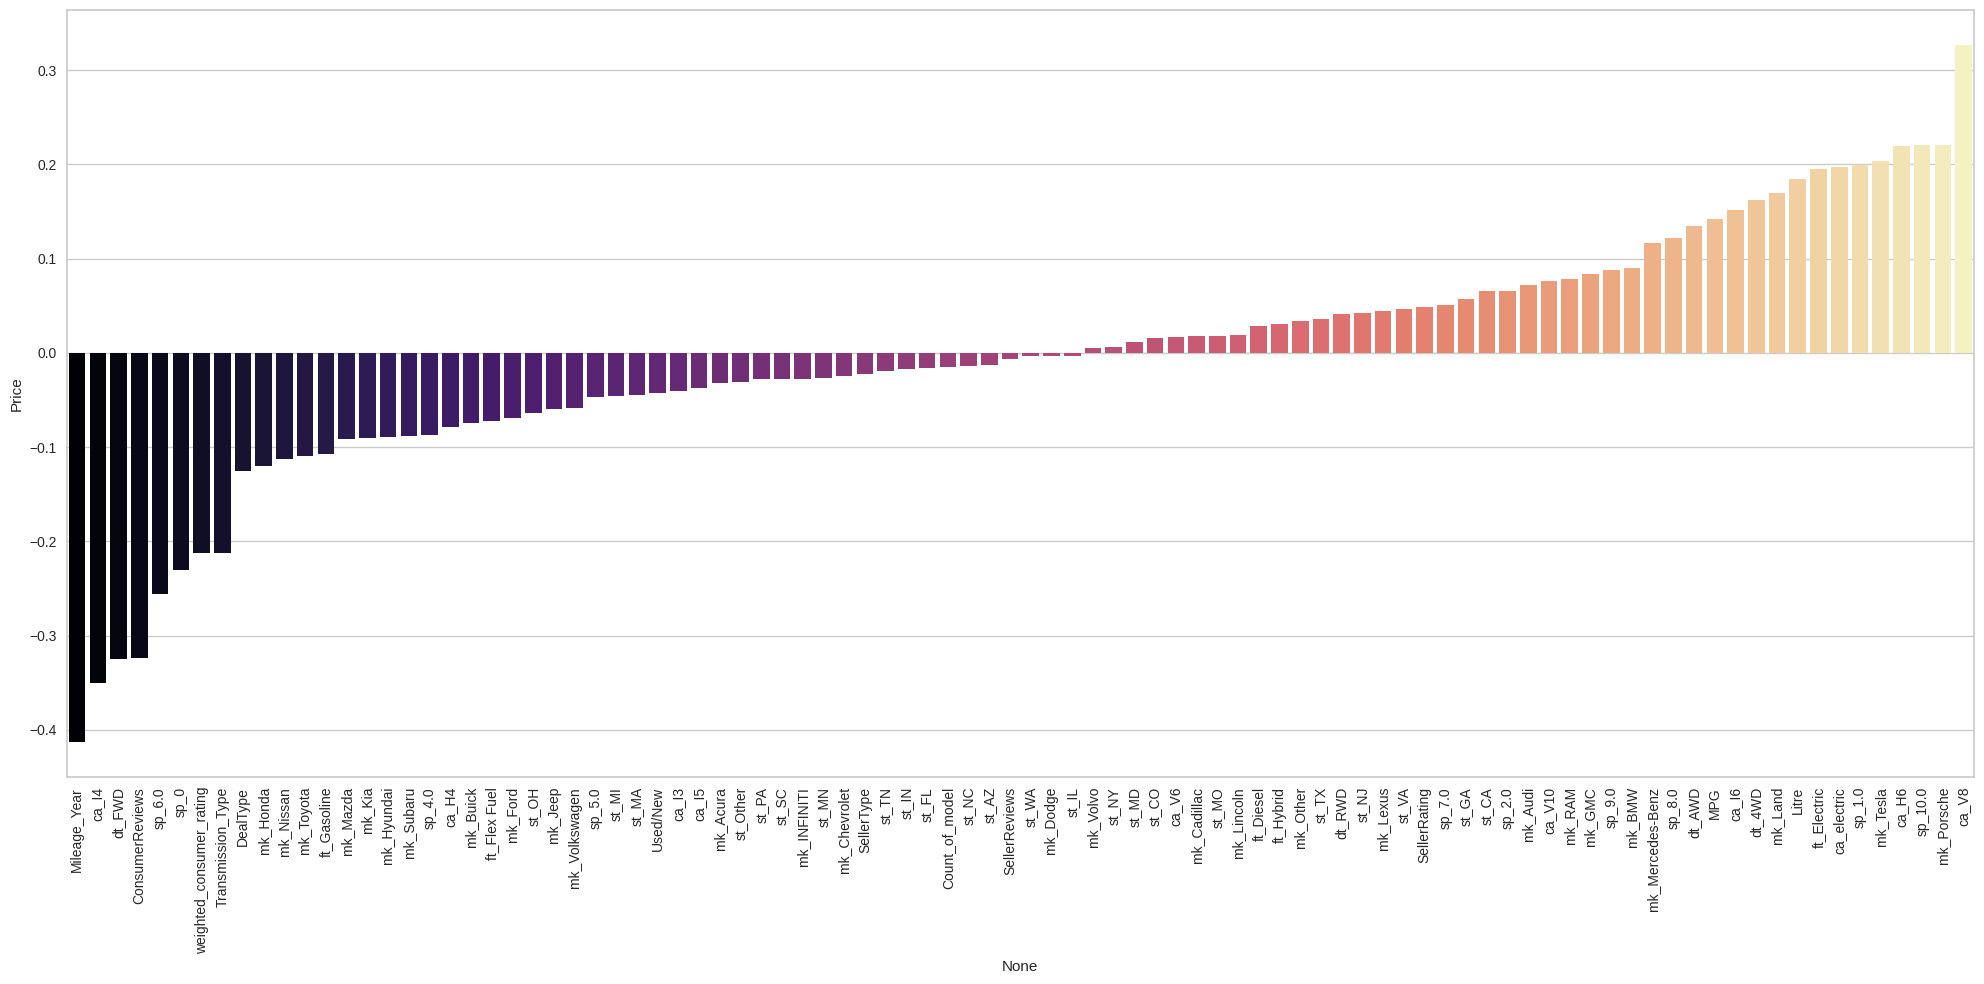

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price, palette="magma")
plt.xticks(rotation=90)
plt.tight_layout();


# Lazy Predict

In [ ]:
pd.set_option('display.max_columns', None)

reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

# Train - Test

### encode işelmelrini X ğzerinden alıp yapabilrisin daha düzelidir

In [252]:
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.feature_selection import SelectKBest


In [128]:
X= df.drop(columns="Price")
y= df.Price


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [130]:
X_train.shape

(6257, 71)

In [100]:
X_test.shape

(1565, 71)

In [101]:
mutual_info = mutual_info_regression(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series = mutual_info_series.sort_values(ascending=False)
print("Mutual Information Scores (Regression):")
print(mutual_info_series)

Mutual Information Scores (Regression):
ConsumerReviews             0.470186
Litre                       0.373508
MPG                         0.359096
weighted_consumer_rating    0.341679
Count_of_model              0.272983
                              ...   
Ttother                     0.002232
SellerType                  0.001086
sp_2.0                      0.000952
ft_Hybrid                   0.000781
mk_Dodge                    0.000000
Length: 71, dtype: float64


In [106]:
mutual_info_df = pd.DataFrame(mutual_info_series)
mutual_info_df.head(9).index

Index(['ConsumerReviews', 'Litre', 'MPG', 'weighted_consumer_rating',
       'Count_of_model', 'Mileage_Year', 'ca_I4', 'dt_FWD', 'Ttcvt'],
      dtype='object')

In [107]:
f_scores, p_values = f_regression(X, y)
f_series = pd.Series(f_scores, index=X.columns)
f_series = f_series.sort_values(ascending=False)
print("\nF-Regression Scores:")
print(f_series)


F-Regression Scores:
Mileage_Year       1610.385356
ca_I4              1091.016229
ca_V8               935.447421
dt_FWD              924.816826
ConsumerReviews     917.937981
                      ...     
Count_of_model        1.679895
Ttother               1.420338
SellerReviews         0.346765
mk_Volvo              0.256205
mk_Dodge              0.094319
Length: 71, dtype: float64


In [108]:
p_values_series = pd.Series(p_values, index=X.columns)

p_values_series = p_values_series.sort_values(ascending=False)

p_values_series_df = pd.DataFrame(p_values_series)
p_values_series_df.tail(20)

0
dt_4WD                     2.014489e-47
mk_Land                    9.272078e-52
Litre                      9.710181e-61
ft_Electric                8.427795e-68
ca_electric                2.176353e-69
sp_1.0                     1.346453e-70
mk_Tesla                   6.222871e-74
weighted_consumer_rating   1.044762e-80
ca_H6                      9.002847e-86
sp_10.0                    1.569139e-86
mk_Porsche                 5.262875e-87
Ttauto                     1.963599e-90
sp_0                       2.421176e-94
Ttcvt                      3.763309e-95
sp_6.0                    3.298413e-117
ConsumerReviews           9.408664e-191
dt_FWD                    4.323181e-192
ca_V8                     3.720211e-194
ca_I4                     4.304184e-224
Mileage_Year              2.329025e-320

In [109]:
f_series_df = pd.DataFrame(f_series)
f_series_df.head(20)

0
Mileage_Year              1610.385356
ca_I4                     1091.016229
ca_V8                      935.447421
dt_FWD                     924.816826
ConsumerReviews            917.937981
sp_6.0                     548.077810
Ttcvt                      440.300691
sp_0                       436.377826
Ttauto                     417.437514
mk_Porsche                 400.864508
sp_10.0                    398.573660
ca_H6                      394.911548
weighted_consumer_rating   370.510032
mk_Tesla                   337.988139
sp_1.0                     322.028882
ca_electric                316.254203
ft_Electric                308.673166
Litre                      275.054538
mk_Land                    232.524971
dt_4WD                     212.075873

In [110]:
# En iyi k özelliği seçelim (örneğin, 5)
from sklearn.feature_selection import SelectKBest

k = 12
select_k_best_f_reg = SelectKBest(f_regression, k=k)
X_new_f_reg = select_k_best_f_reg.fit_transform(X, y)

print("\nSelected features using F-Regression:")
print(X.columns[select_k_best_f_reg.get_support()])


Selected features using F-Regression:
Index(['ConsumerReviews', 'Mileage_Year', 'dt_FWD', 'mk_Porsche', 'ca_H6',
       'ca_I4', 'ca_V8', 'sp_0', 'sp_10.0', 'sp_6.0', 'Ttauto', 'Ttcvt'],
      dtype='object')


In [147]:
df_my = df1[["Price",'ConsumerReviews', 'Litre', 'MPG', 'weighted_consumer_rating','Count_of_model', 'Mileage_Year', 'ca_I4', 'dt_FWD', 'Ttcvt',"Ttauto","mk_Porsche","ca_H6","ca_V8","sp_0","sp_10.0"]]

In [148]:
Xm= df_my.drop(columns="Price")
ym= df_my.Price
X_trainm, X_testm, y_trainm, y_testm = train_test_split(Xm, ym, test_size=0.20, random_state=42)


In [149]:
operations = [("LGBM_model", LGBMRegressor(random_state=101, objective='regression'))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_trainm, y_trainm)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001770 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 6117, number of used features: 14
[LightGBM] [Info] Start training from score 38.135375


Pipeline(steps=[('LGBM_model',
                 LGBMRegressor(objective='regression', random_state=101))])

In [150]:
train_val(pipe_model, X_trainm, y_trainm, X_testm, y_testm)# feature seelction yöntermlerinden en yüksek olanları seçtiğimde test gücünün düşütüğünü görüyorum ve bunun yanında yapılan hatalarda bi o kadar artımış durumdalar

train       test
R2     0.932369   0.892345
MAE    2.616043   3.097516
MSE   12.473952  18.212195
RMSE   3.531848   4.267575
MAPE   7.609548   9.319840

In [151]:
operations = [("LGBM_model",
               LGBMRegressor(random_state=101, objective='regression'))]

pipe_model = Pipeline(steps=operations)
scores = cross_validate(pipe_model,
                        X_trainm,
                        y_trainm,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)

pd.DataFrame(scores).mean()[2:]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 893
[LightGBM] [Info] Number of data points in the train set: 5505, number of used features: 14
[LightGBM] [Info] Start training from score 38.113667
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Number of data points in the train set: 5505, number of used features: 14
[LightGBM] [Info] Start training from score 38.143962
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 895
[LightGBM] [Info] Number of data points in the train set: 5505, number of used features: 14
[LightGBM] [Info] Start trainin

test_r2                               0.891185
train_r2                              0.934339
test_neg_mean_absolute_error         -3.181078
train_neg_mean_absolute_error        -2.582533
test_neg_mean_squared_error         -19.989576
train_neg_mean_squared_error        -12.110108
test_neg_root_mean_squared_error     -4.467838
train_neg_root_mean_squared_error    -3.479915
dtype: float64

In [253]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [254]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {
        "train": {
            "R2": r2_score(y_train, y_train_pred),
            "MAE": mean_absolute_error(y_train, y_train_pred),
            "MSE": mean_squared_error(y_train, y_train_pred),
            "RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
            "MAPE": mean_absolute_percentage_error(y_train, y_train_pred)
        },
        "test": {
            "R2": r2_score(y_test, y_pred),
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "MAPE": mean_absolute_percentage_error(y_test, y_pred)
        }
    }

    return pd.DataFrame(scores)

# LightGBM

In [255]:
from lightgbm import LGBMRegressor


In [256]:
operations = [("LGBM_model", LGBMRegressor(random_state=101, objective='regression'))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1293
[LightGBM] [Info] Number of data points in the train set: 6117, number of used features: 66
[LightGBM] [Info] Start training from score 38.111796


Pipeline(steps=[('LGBM_model',
                 LGBMRegressor(objective='regression', random_state=101))])

In [257]:
train_val(model, X_train, y_train, X_test, y_test)


train       test
R2    0.948051   0.913144
MAE   2.259744   2.778497
MSE   9.274371  16.752771
RMSE  3.045385   4.093015
MAPE  6.655362   8.033548

## CV sonrası sonuçlarımız arttı

In [258]:
operations = [("LGBM_model",
               LGBMRegressor(random_state=101, objective='regression'))]

model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)

pd.DataFrame(scores).mean()[2:]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 5505, number of used features: 64
[LightGBM] [Info] Start training from score 38.160986
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1283
[LightGBM] [Info] Number of data points in the train set: 5505, number of used features: 65
[LightGBM] [Info] Start training from score 38.103755
[LightGBM] [Warning] Found w

test_r2                               0.904464
train_r2                              0.949684
test_neg_mean_absolute_error         -2.920177
train_neg_mean_absolute_error        -2.230734
test_neg_mean_squared_error         -17.015417
train_neg_mean_squared_error         -8.982570
test_neg_root_mean_squared_error     -4.122279
train_neg_root_mean_squared_error    -2.997049
dtype: float64

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1293
[LightGBM] [Info] Number of data points in the train set: 6117, number of used features: 66
[LightGBM] [Info] Start training from score 38.111796


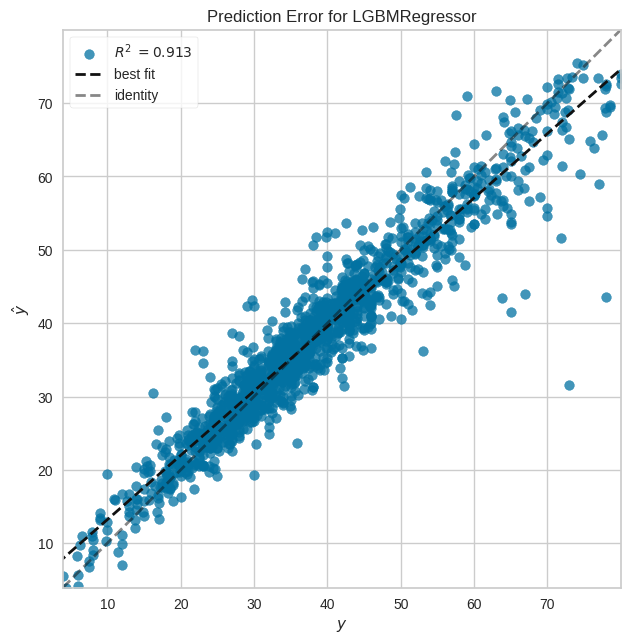

In [260]:
visualizer = RadViz(size=(720, 3000))
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();
#Ortadaki çizgi mükemmel olandır. ama. bu iki çizgiyi birbirne yakınlaştırmaktır.
#burdan outlier tespiti de yaparız ve görürüz hataya sebep var mı diye

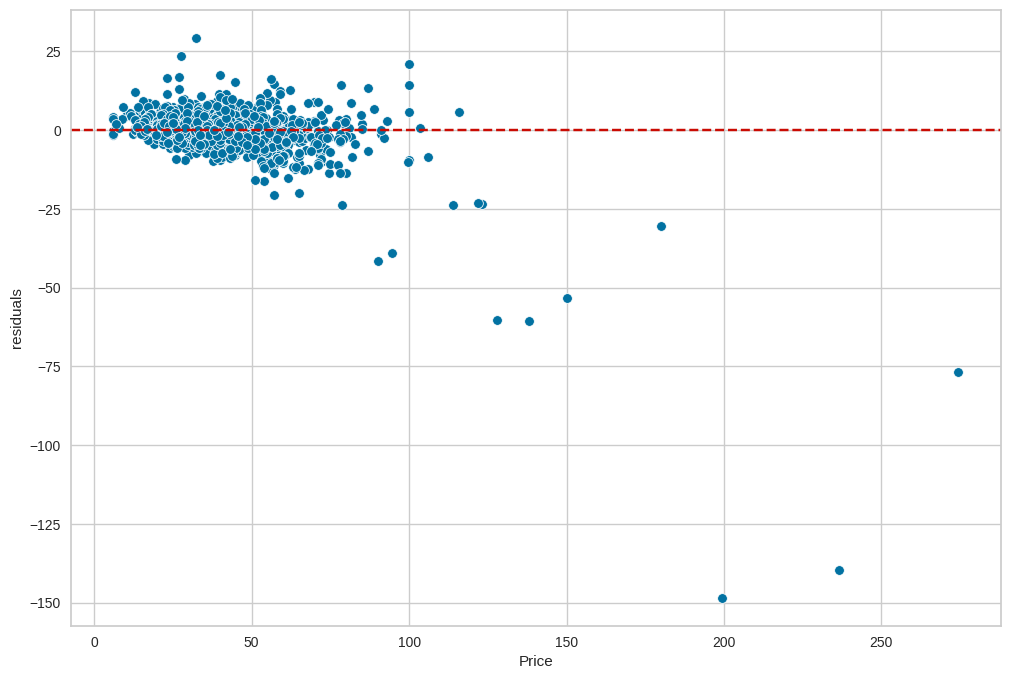

In [136]:
plt.figure(figsize=(12,8))
y_pred = pipe_model.predict(X_test)
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()


In [144]:
outlier_price = df[df.Price>80.000]

In [ ]:
outlier_price

Used/New    Price  ConsumerReviews  SellerType  SellerRating  \
64           0  106.999                2           0           4.7   
122          1  107.998               19           0           3.7   
139          0   84.888                3           0           4.8   
140          1   86.995                6           0           4.7   
196          1   81.749               22           0           4.4   
...        ...      ...              ...         ...           ...   
8034         1   81.528               22           0           4.5   
8088         1   89.688               23           0           4.6   
8161         1   82.350               15           0           4.9   
8193         1   88.991               11           0           4.3   
8261         1  105.991                4           0           4.8   

      SellerReviews  DealType  Transmission_Type  weighted_consumer_rating  \
64              738         0                  0                    17.250   
122               6         1                  0                     4.104   
139             213         2                  0                    17.920   
140            1381         2                  0                    15.587   
196              84         0                  0                     9.560   
...             ...       ...                ...                       ...   
8034           1499         2                  0                     9.560   
8088            796         1                  0                    17.591   
8161           3110         0                  0                    13.691   
8193             34         1                  0                    15.256   
8261            531         0                  0                    17.950   

       MPG  Litre  Count_of_model  Mileage_Year  dt_4WD  dt_AWD  dt_FWD  \
64     345    4.0             736     -0.706767       0       1       0   
122    266    6.2             250     -0.990804       1       0       0   
139    374    2.9             112     -1.573173       0       1       0   
140    456    0.0             154     -1.364677       1       0       0   
196    315    4.4             835     -0.361138       0       1       0   
...    ...    ...             ...           ...     ...     ...     ...   
8034   315    4.4             835     -0.679176       0       1       0   
8088   468    3.8             112      1.180182       0       1       0   
8161  7654    0.0             142      0.362101       0       1       0   
8193   374    0.0             154     -0.739865       1       0       0   
8261   374    0.0             154     -1.619840       1       0       0   

      dt_RWD  ft_Diesel  ft_Electric  ft_Flex Fuel  ft_Gasoline  ft_Hybrid  \
64         0          0            0             0            1          0   
122        0          0            0             0            1          0   
139        0          0            0             0            1          0   
140        0          0            0             0            1          0   
196        0          0            0             0            1          0   
...      ...        ...          ...           ...          ...        ...   
8034       0          0            0             0            1          0   
8088       0          0            0             0            1          0   
8161       0          0            1             0            0          0   
8193       0          0            0             0            1          0   
8261       0          0            0             0            1          0   

      mk_Acura  mk_Audi  mk_BMW  mk_Buick  mk_Cadillac  mk_Chevrolet  \
64           0        0       0         0            0             0   
122          0        0       0         0            1             0   
139          0        0       0         0            0             0   
140          0        0       0         0            0             0   
196          0        0       

In [261]:
df1 = df[~(df.Price>80.000)]  #sadece bunlara değilde tüm featurlara bakabilirsin.
#feature selction= getdummies'ten sonra bakabilirsin. mi(bilgi kazancı), featureviz(kütüphane)
X = df1.drop(columns = "Price")
y = df1.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [262]:
operations = [("LGBM_model", LGBMRegressor(random_state=101, objective='regression'))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)
train_val(pipe_model, X_train, y_train, X_test, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1293
[LightGBM] [Info] Number of data points in the train set: 6117, number of used features: 66
[LightGBM] [Info] Start training from score 38.111796


train       test
R2    0.948051   0.913144
MAE   2.259744   2.778497
MSE   9.274371  16.752771
RMSE  3.045385   4.093015
MAPE  6.655362   8.033548

# Feature selection

k2 skoru ve midan gelenleri ayrı ayır ddeğelndirmesi

In [264]:
mi_df = df1[["Price","ConsumerReviews","Litre","MPG","weighted_consumer_rating","Count_of_model","Mileage_Year","ca_I4","dt_FWD","ca_V8"]]
k2_df = df1[["Price","ConsumerReviews","sp_6.0","sp_0","mk_Porsche", "sp_10.0","weighted_consumer_rating","Mileage_Year","ca_I4","ca_H6","dt_FWD","ca_V8"]]


In [268]:
Xm = mi_df.drop(columns = "Price")
ym = mi_df.Price

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(Xm, ym, test_size=0.2, random_state=101)

##  k2 skorundan seçtikten sonra tek bir dfte birleşim
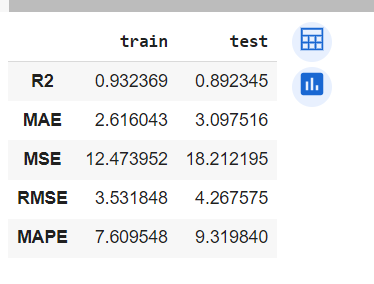

## mi'dan seçilen featurların daha iyi etkierliğini görmüş olduk

In [ ]:
X = k2_df.drop(columns = "Price")
y = k2_df.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
operations = [("LGBM_model", LGBMRegressor(random_state=101, objective='regression'))]

pipe_model_k2 = Pipeline(steps=operations)

pipe_model_k2.fit(X_train, y_train)
train_val(pipe_model_k2, X_train, y_train, X_test, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 6117, number of used features: 11
[LightGBM] [Info] Start training from score 38.111796


train       test
R2     0.892785   0.864805
MAE    3.197417   3.559886
MSE   19.140759  26.076503
RMSE   4.375015   5.106516
MAPE   9.428137  10.376193

## FeatureWiz

In [152]:
pip install featurewiz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.5/150.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 10.0 MB/s eta 0:00:00
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2436 sha256=2ad0564ce7f6fc87ca8259442383ac2be3b95088351659a427033f506d353c78
  Stored in directory: /root/.cache/pip/wheels/a6/ff/5d/4f10de26fe

In [270]:
import featurewiz as gwiz



In [271]:
wiz =gwiz.FeatureWiz(verbose=1)



featurewiz is given 0.9 as correlation limit...
    Skipping feature engineering since no feature_engg input...
    final list of category encoders given: ['label', 'label']
    final list of scalers given: []


Loaded input data. Shape = (6117, 71)
    selecting 71 numeric features for further processing...
#### Starting featurewiz transform for train data ####
    Single_Label Regression problem 
Shape of dataset: (6117, 71). Now we classify variables into different types...
    Returning dictionary for variable types with following keys:
                        continuous_vars = 4, int_vars = 67, 
                        discrete_string_vars = 0, nlp_vars = 0,
                        date_vars = 0, time_deltas = 0,
                        categorical_vars = 0, date_zones = 0
    no date time variables detected in this dataset
label encoder selected for transforming all categorical variables
Using My_LabelEncoder() and My_LabelEncoder() as encoders
    alert: there is no scaler specified. Options are: max, std, robust, maxabs.
    no other vars left in dataset to transform...
Time taken to define data pipeline = 1 second(s)
No model input given...
Lazy Transformer Pipeline created...
    Tim

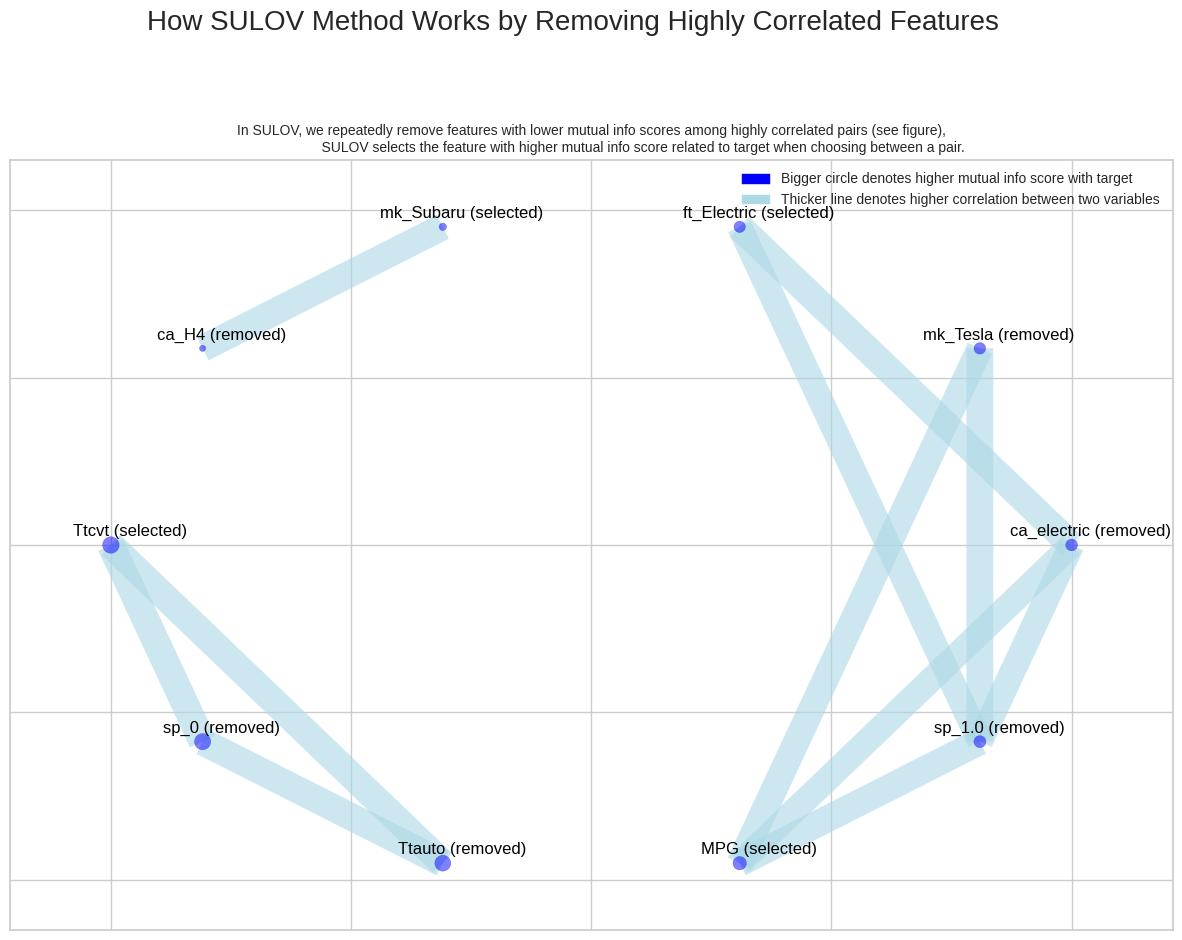

Performing recursive XGBoost feature selection from 64 features...
    Taking top 12 features per iteration...
    Number of booster rounds = 100
        Selected: ['Mileage_Year', 'ConsumerReviews', 'MPG', 'ca_I4', 'Litre', 'weighted_consumer_rating', 'Count_of_model', 'dt_FWD', 'DealType', 'sp_6.0', 'Ttcvt', 'sp_10.0']
        Selected: ['Mileage_Year', 'MPG', 'ca_I4', 'Litre', 'weighted_consumer_rating', 'sp_6.0', 'Ttcvt', 'ca_I6', 'mk_BMW', 'mk_Mercedes-Benz', 'ca_V6', 'sp_10.0']
        Selected: ['Mileage_Year', 'MPG', 'ca_I4', 'Litre', 'weighted_consumer_rating', 'sp_6.0', 'Ttcvt', 'ca_V6', 'ca_I6', 'sp_10.0', 'mk_Mercedes-Benz', 'SellerRating']
        Selected: ['Mileage_Year', 'MPG', 'ca_I4', 'Litre', 'weighted_consumer_rating', 'sp_6.0', 'Ttcvt', 'ca_I6', 'ca_V6', 'sp_10.0', 'SellerRating', 'sp_9.0']
        Selected: ['MPG', 'Mileage_Year', 'Litre', 'weighted_consumer_rating', 'sp_8.0', 'sp_9.0', 'SellerRating', 'sp_7.0', 'Ttcvt', 'Ttother', 'mk_Subaru', 'ft_Electric']
    

In [272]:
X = df1.drop(columns = "Price")
y = df1.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

X_train_s, y_train = wiz.fit_transform(X_train, y_train)

X_test_s = wiz.transform(X_test)




In [273]:
operations = [("LGBM_model", LGBMRegressor(random_state=101, objective='regression'))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train_s, y_train)
train_val(pipe_model, X_train_s, y_train, X_test_s, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 6117, number of used features: 23
[LightGBM] [Info] Start training from score 38.111796


train       test
R2    0.944755   0.909400
MAE   2.334676   2.865518
MSE   9.862731  17.474988
RMSE  3.140498   4.180309
MAPE  6.867708   8.294773

## tüm işelmler sonucu en doğru sonucu veren parametreler bu şekildedir


# HyperParametre Optimizasyonu

In [171]:
from sklearn.model_selection import train_test_split, GridSearchCV


In [288]:
param_grid = {
    'LGBM_model__lambda_l1': [0.1, 0.5, 1],
    'LGBM_model__lambda_l2': [1, 5, 10],
    'LGBM_model__min_split_gain': [0.01, 0.05, 0.1],
    'LGBM_model__learning_rate': [0.01, 0.05, 0.1],
    'LGBM_model__num_leaves': [20, 32, 36],
    'LGBM_model__n_estimators': [100, 200, 500],
    'LGBM_model__max_depth': [5, 7, 9],
    'LGBM_model__subsample': [0.6, 0.8],
    'LGBM_model__colsample_bytree': [0.6, 0.8]
}



In [289]:
operations = [("LGBM_model", LGBMRegressor(random_state=101, objective='regression', verbose=-1))]

model = Pipeline(steps=operations)

# GridSearchCV ile hiperparametre optimizasyonu
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1,return_train_score=True)

# Modeli eğitme
grid_search.fit(X_train_s, y_train)

# En iyi hiperparametreleri ve sonuçları yazdır
print(f"En iyi parametreler: {grid_search.best_params_}")
print(f"En iyi skor: {grid_search.best_score_}")

En iyi parametreler: {'LGBM_model__colsample_bytree': 0.8, 'LGBM_model__lambda_l1': 0.1, 'LGBM_model__lambda_l2': 1, 'LGBM_model__learning_rate': 0.1, 'LGBM_model__max_depth': 5, 'LGBM_model__min_split_gain': 0.05, 'LGBM_model__n_estimators': 500, 'LGBM_model__num_leaves': 32, 'LGBM_model__subsample': 0.8}
En iyi skor: -15.927244317519879


In [290]:
# En iyi model ile test setinde performans değerlendirmesi
best_model = grid_search.best_estimator_
y_pred = grid_search.predict(X_test_s)
mse = mean_squared_error(y_test, y_pred)
print(f"Test seti MSE: {mse}")

Test seti MSE: 14.755744999182799


In [291]:
train_val(grid_search, X_train_s, y_train, X_test_s, y_test)

train       test
R2    0.965887   0.923498
MAE   1.855731   2.621274
MSE   6.090179  14.755745
RMSE  2.467829   3.841321
MAPE  5.409261   7.747282

In [292]:
#best scorelar seçilerek oluşturulan param grid
param_grid = {
    'LGBM_model__lambda_l1': [0.1],
    'LGBM_model__lambda_l2': [1],
    'LGBM_model__min_split_gain': [0.05],
    'LGBM_model__learning_rate': [0.1],
    'LGBM_model__n_estimators': [500],
    'LGBM_model__max_depth': [5],
    "LGBM_model__num_leaves": [32],
    'LGBM_model__subsample': [0.8],
    'LGBM_model__colsample_bytree': [0.8]
}

In [293]:
from sklearn.model_selection import GridSearchCV

operations = [("LGBM_model", LGBMRegressor(random_state=101, objective='regression', verbose=-1))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True).fit(X_train_s, y_train)

In [ ]:
train_val(grid_model, X_train_s, y_train, X_test_s, y_test)

train       test
R2    0.965958   0.922403
MAE   1.848675   2.645036
MSE   6.077362  14.966876
RMSE  2.465231   3.868705
MAPE  5.349735   7.887676

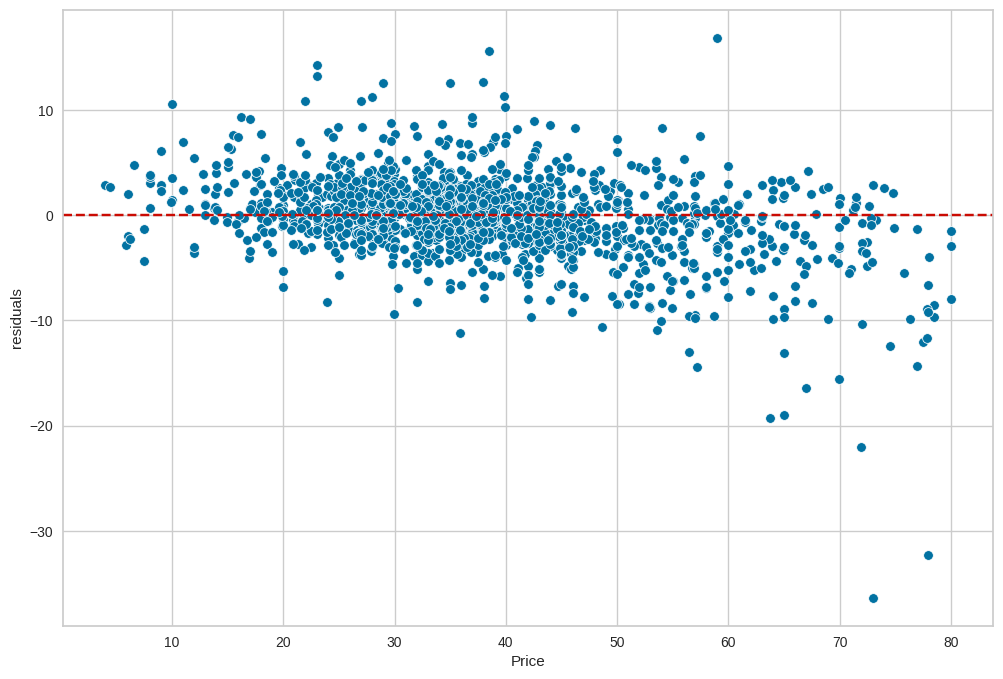

In [294]:
plt.figure(figsize=(12,8))
y_pred = grid_model.predict(X_test_s)
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()


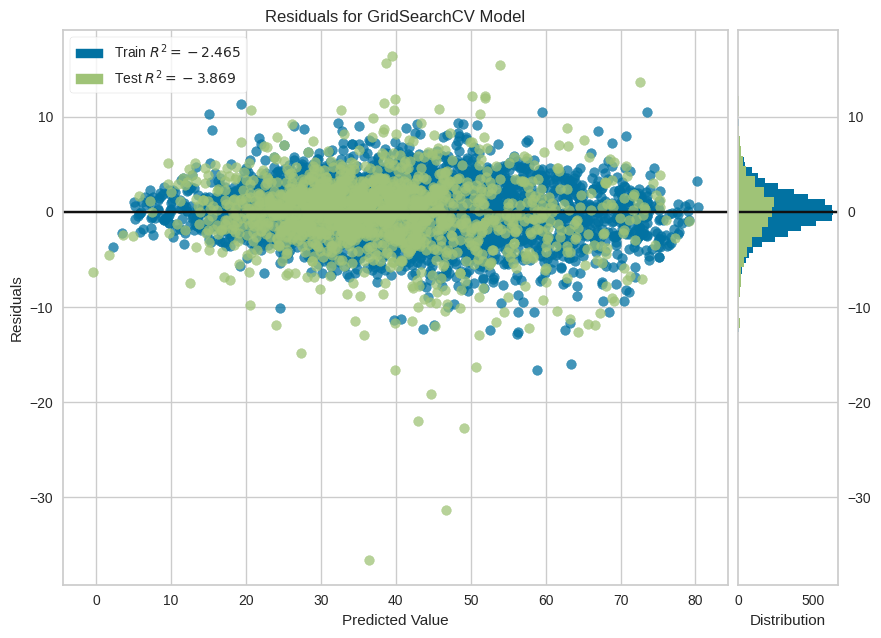

In [ ]:
visualizer = RadViz(size=(1000, 720))
visualizer = ResidualsPlot(grid_model)

visualizer.fit(X_train_s, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_s, y_test)  # Evaluate the model on the test data
visualizer.show();

# Clean the last outlier

In [297]:
last_df = df1[~(df1.Price>75.000)]  #sadece bunlara değilde tüm featurlara bakabilirsin.


Loaded input data. Shape = (6059, 71)
    selecting 71 numeric features for further processing...
#### Starting featurewiz transform for train data ####
    Single_Label Regression problem 
Shape of dataset: (6059, 71). Now we classify variables into different types...
    Returning dictionary for variable types with following keys:
                        continuous_vars = 4, int_vars = 67, 
                        discrete_string_vars = 0, nlp_vars = 0,
                        date_vars = 0, time_deltas = 0,
                        categorical_vars = 0, date_zones = 0
    no date time variables detected in this dataset
label encoder selected for transforming all categorical variables
Using My_LabelEncoder() and My_LabelEncoder() as encoders
    alert: there is no scaler specified. Options are: max, std, robust, maxabs.
    no other vars left in dataset to transform...
Time taken to define data pipeline = 1 second(s)
No model input given...
Lazy Transformer Pipeline created...
    Tim

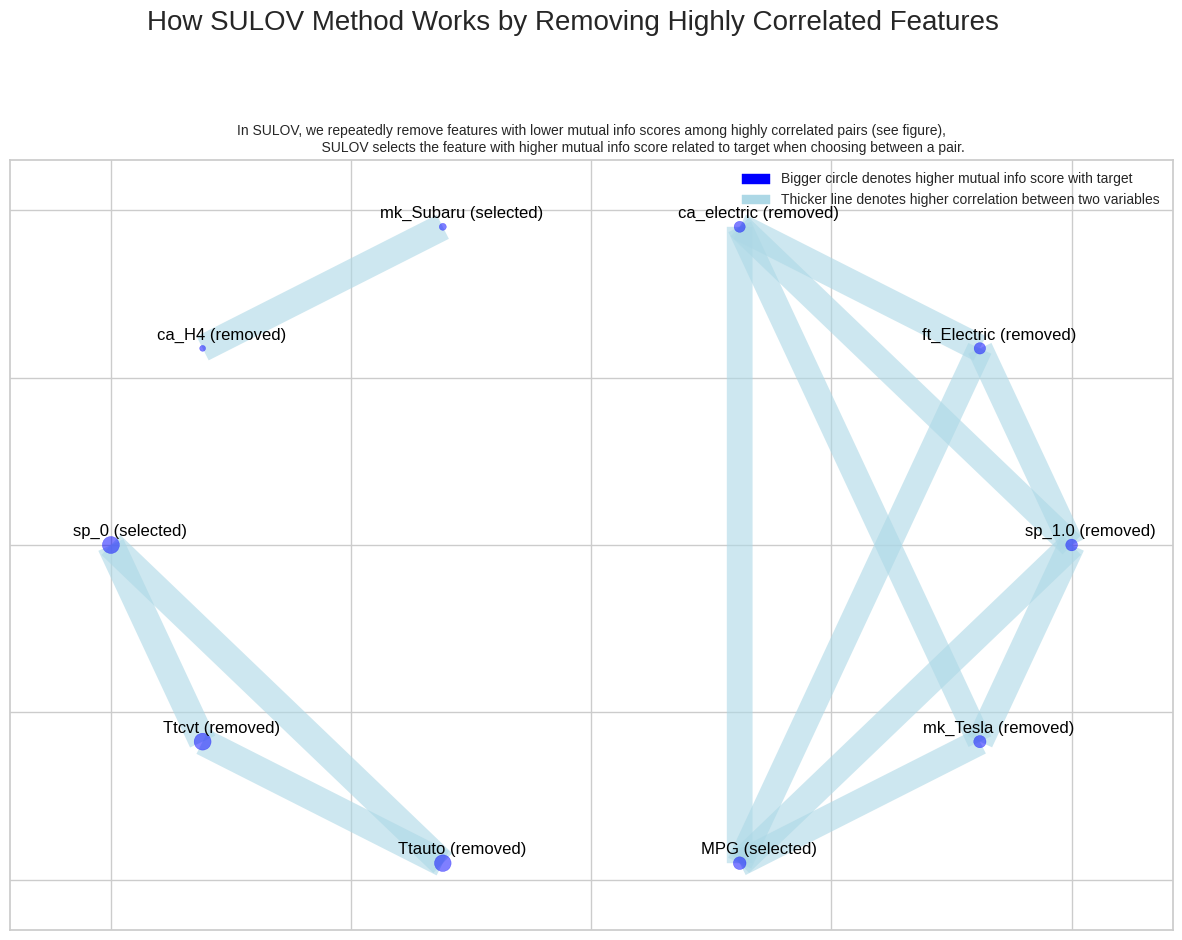

Performing recursive XGBoost feature selection from 63 features...
    Taking top 12 features per iteration...
    Number of booster rounds = 100
        Selected: ['Mileage_Year', 'ConsumerReviews', 'MPG', 'ca_I4', 'Litre', 'weighted_consumer_rating', 'Count_of_model', 'dt_FWD', 'sp_6.0', 'DealType', 'ca_V8', 'sp_0']
        Selected: ['Mileage_Year', 'MPG', 'ca_I4', 'weighted_consumer_rating', 'Litre', 'sp_6.0', 'sp_0', 'mk_BMW', 'ca_V6', 'mk_Mercedes-Benz', 'SellerRating', 'sp_10.0']
        Selected: ['Mileage_Year', 'MPG', 'ca_I4', 'weighted_consumer_rating', 'Litre', 'sp_6.0', 'sp_0', 'ca_V6', 'ca_I6', 'ca_V8', 'mk_Mercedes-Benz', 'SellerRating']
        Selected: ['Mileage_Year', 'MPG', 'ca_I4', 'weighted_consumer_rating', 'Litre', 'sp_6.0', 'sp_0', 'ca_V6', 'ca_I6', 'ca_V8', 'SellerRating', 'sp_10.0']
        Selected: ['MPG', 'Mileage_Year', 'Litre', 'weighted_consumer_rating', 'sp_8.0', 'sp_9.0', 'SellerRating', 'sp_7.0', 'sp_0', 'mk_Subaru', 'Ttother']
    time taken to run 

In [298]:
X = last_df.drop(columns = "Price")
y = last_df.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train_s, y_train = wiz.fit_transform(X_train, y_train)
X_test_s = wiz.transform(X_test)




In [300]:
from sklearn.model_selection import GridSearchCV

operations = [("LGBM_model", LGBMRegressor(random_state=101, objective='regression', verbose=-1))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True).fit(X_train_s, y_train)



train_val(grid_model, X_train_s, y_train, X_test_s, y_test)



train       test
R2    0.966161   0.916833
MAE   1.793564   2.619815
MSE   5.692663  13.655622
RMSE  2.385930   3.695351
MAPE  5.220485   7.952714

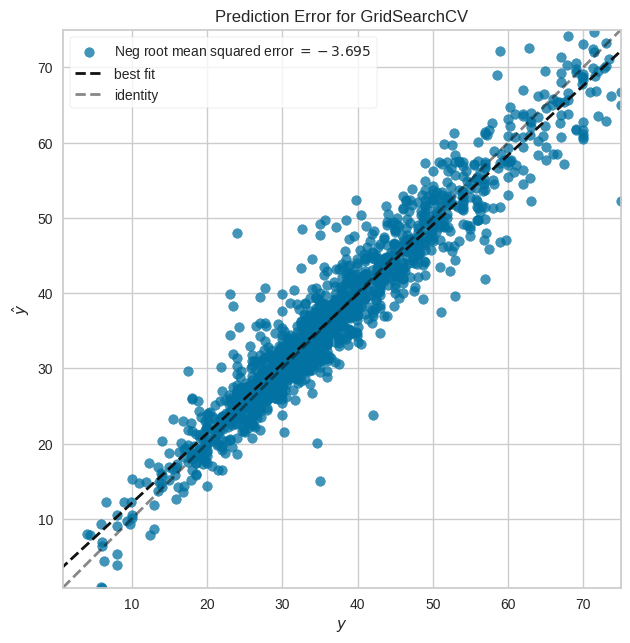

In [301]:
visualizer = RadViz(size=(720, 3000))
visualizer = PredictionError(grid_model)
visualizer.fit(X_train_s, y_train)
visualizer.score(X_test_s, y_test)
visualizer.show();
#Ortadaki çizgi mükemmel olandır. ama. bu iki çizgiyi birbirne yakınlaştırmaktır.
#burdan outlier tespiti de yaparız ve görürüz hataya sebep var mı diye

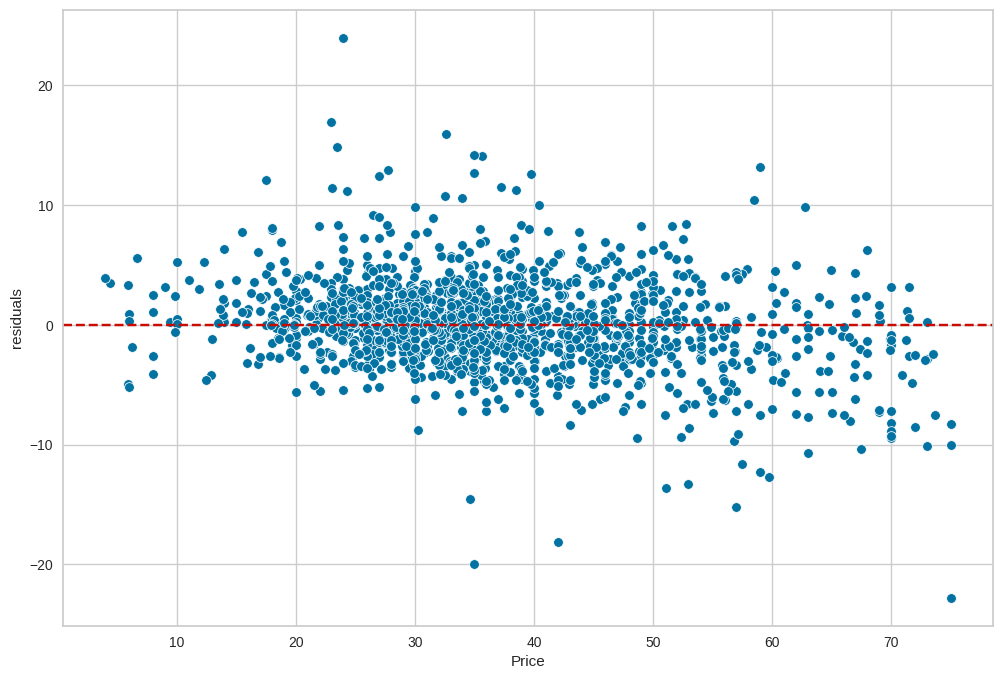

In [302]:
plt.figure(figsize=(12,8))
y_pred = grid_model.predict(X_test_s)
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()


In [303]:
results_df = pd.DataFrame({
    "actual": y_test,
    "predict": y_pred,
    "residuals": y_test - y_pred
})

In [304]:
results_df

actual    predict  residuals
4775  34.649  20.074179  14.574821
6100  51.900  52.959897  -1.059897
5621  34.367  35.858248  -1.491248
1670  41.495  42.196285  -0.701285
6127  38.500  49.763269 -11.263269
...      ...        ...        ...
7434  42.591  42.821550  -0.230550
4133  40.339  41.555103  -1.216103
7166  25.491  27.708371  -2.217371
2682  44.989  48.405005  -3.416005
834   37.995  36.894890   1.100110

[1515 rows x 3 columns]

In [305]:
results_df[results_df["residuals"]>20]

actual    predict  residuals
6354  74.998  52.206117  22.791883

## residual'ları fazla olanlara baktım fakat aralarında bir bağlantı bulamadım neden yanlış tahmin ettiğine dair belki o kategori de az ürün olduğundan olabilir

In [308]:
X_test_s.loc[[6354]]  #marka = ram

Mileage_Year  ConsumerReviews  MPG  ca_I4  Litre  \
6354       0.27227               16  391      0    0.0   

      weighted_consumer_rating  Count_of_model  dt_FWD  sp_6.0  DealType  \
6354                    13.362             154       0       0         1   

      ca_V8  sp_0  mk_BMW  ca_V6  mk_Mercedes-Benz  SellerRating  sp_10.0  \
6354      0     0       0      1                 0           4.6        1   

      ca_I6  sp_8.0  sp_9.0  sp_7.0  mk_Subaru  Ttother  
6354      0       0       0       0          0        0

In [309]:
y_test.loc[[6354]]

6354    74.998
Name: Price, dtype: float64